In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

k = 0.1  # 前视距离系数
Lfc = 2.0  # 前视距离
Kp = 1.0  # 速度P控制器系数
dt = 0.1  # 时间间隔，单位：s
L = 2.9  # 车辆轴距，单位：m

In [2]:
class VehicleState:

    def __init__(self, x=0.0, y=0.0, yaw=0.0, v=0.0):
        self.x = x
        self.y = y
        self.yaw = yaw
        self.v = v


def update(state, a, delta):

    state.x = state.x + state.v * math.cos(state.yaw) * dt
    state.y = state.y + state.v * math.sin(state.yaw) * dt
    state.yaw = state.yaw + state.v / L * math.tan(delta) * dt
    state.v = state.v + a * dt

    return state

In [3]:
def PControl(target, current):
    a = Kp * (target - current)

    return a


def pure_pursuit_control(state, cx, cy, pind):

    ind = calc_target_index(state, cx, cy)

    if pind >= ind:
        ind = pind

    if ind < len(cx):
        tx = cx[ind]
        ty = cy[ind]
    else:
        tx = cx[-1]
        ty = cy[-1]
        ind = len(cx) - 1

    alpha = math.atan2(ty - state.y, tx - state.x) - state.yaw

    if state.v < 0:  # back
        alpha = math.pi - alpha

    Lf = k * state.v + Lfc

    delta = math.atan2(2.0 * L * math.sin(alpha) / Lf, 1.0)

    return delta, ind

In [4]:
def calc_target_index(state, cx, cy):
    # 搜索最临近的路点
    dx = [state.x - icx for icx in cx]
    dy = [state.y - icy for icy in cy]
    d = [abs(math.sqrt(idx ** 2 + idy ** 2)) for (idx, idy) in zip(dx, dy)]
    ind = d.index(min(d))
    L = 0.0

    Lf = k * state.v + Lfc

    while Lf > L and (ind + 1) < len(cx):
        dx = cx[ind + 1] - cx[ind]
        dy = cx[ind + 1] - cx[ind]
        L += math.sqrt(dx ** 2 + dy ** 2)
        ind += 1

    return ind

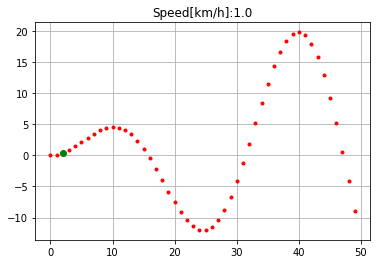

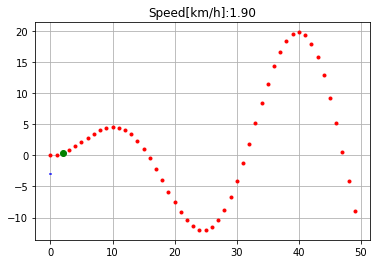

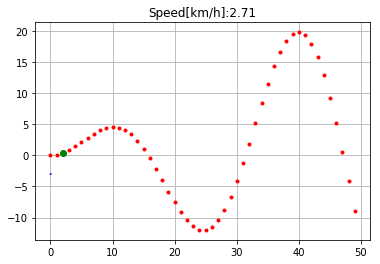

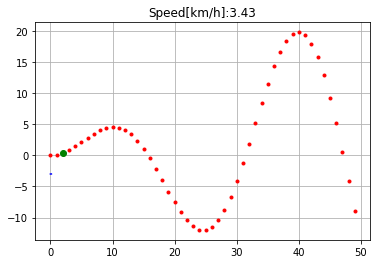

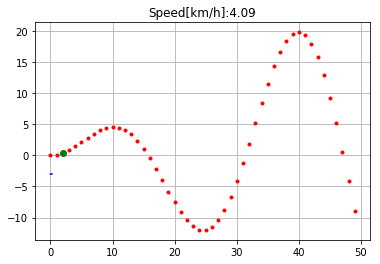

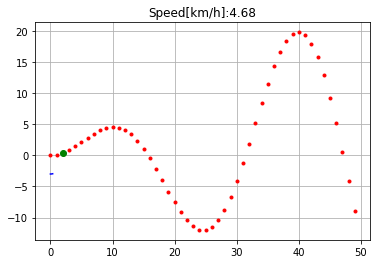

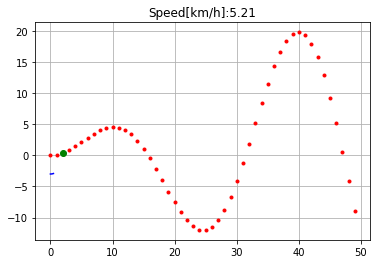

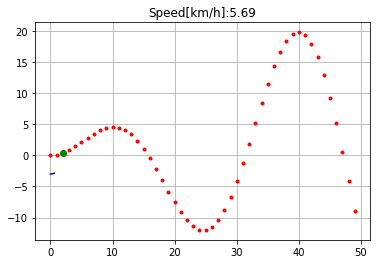

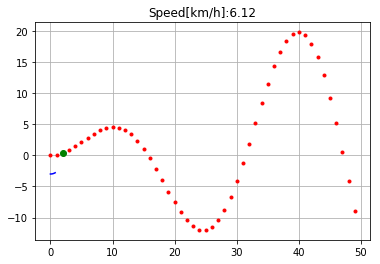

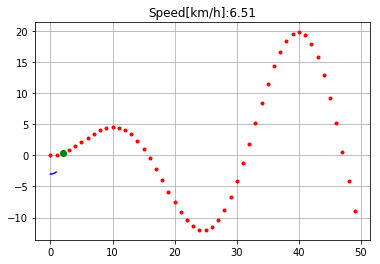

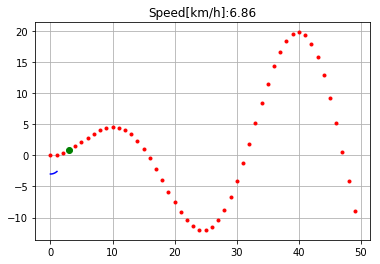

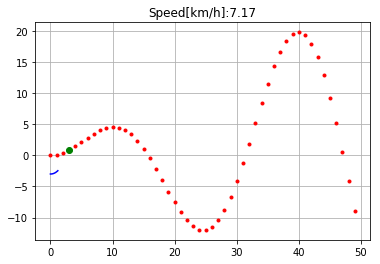

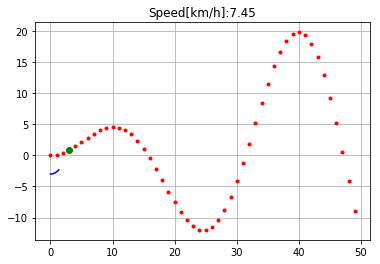

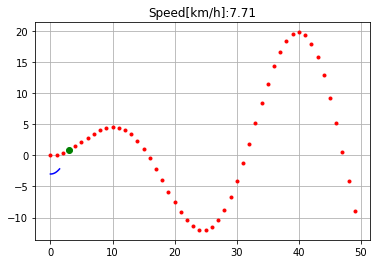

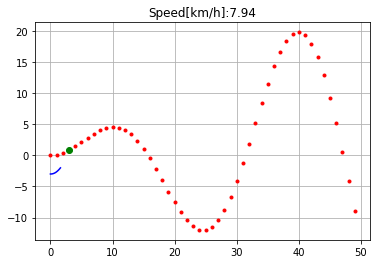

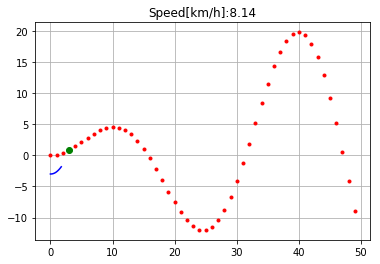

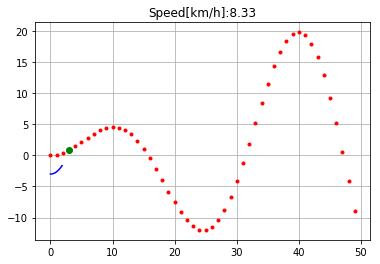

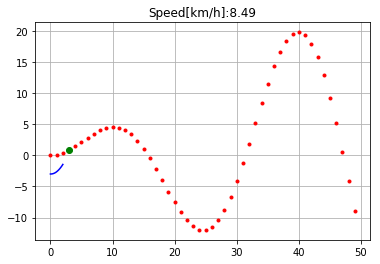

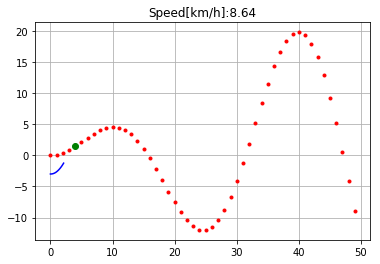

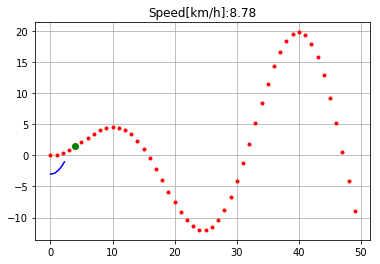

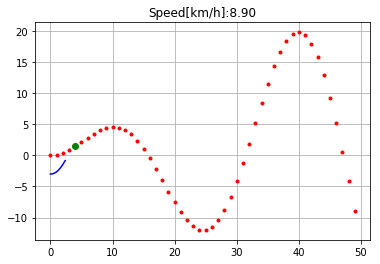

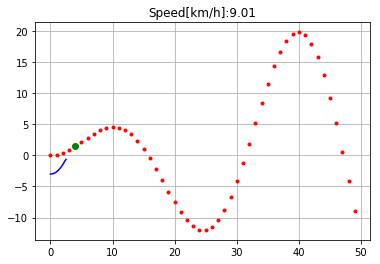

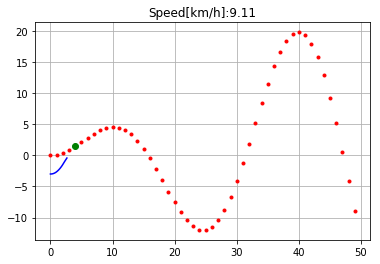

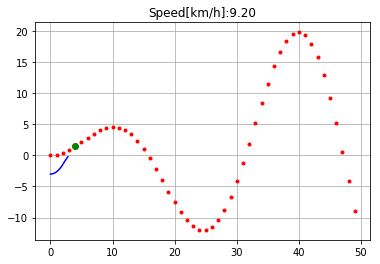

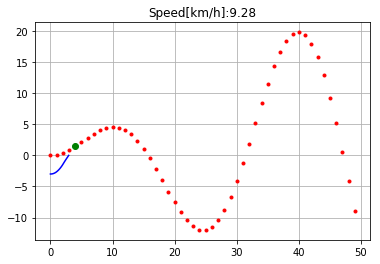

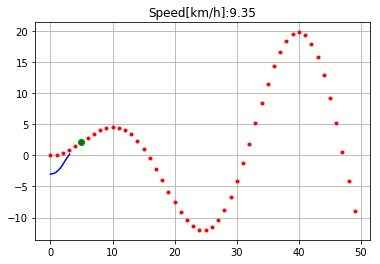

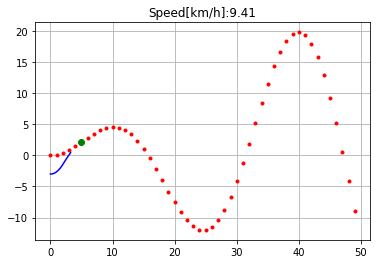

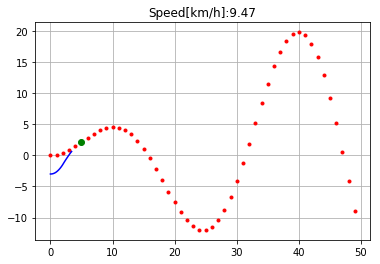

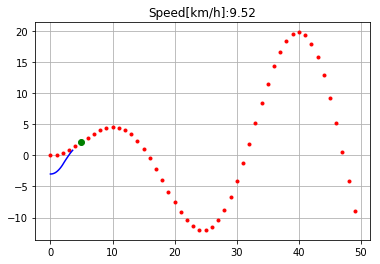

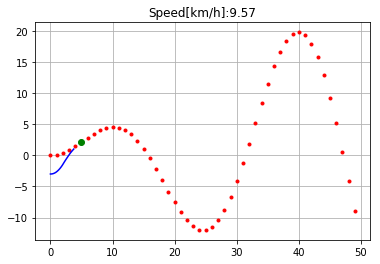

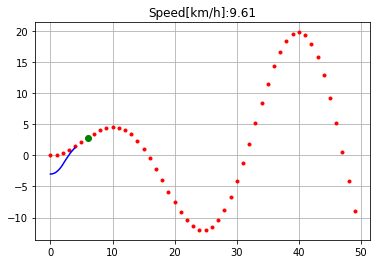

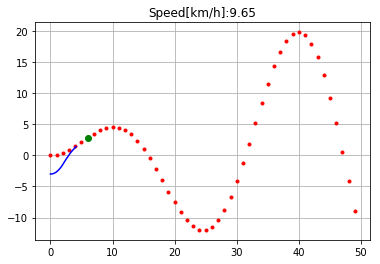

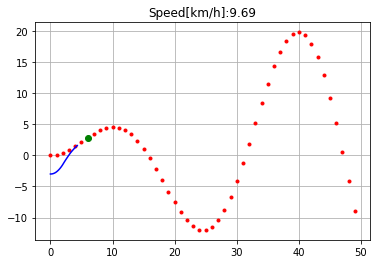

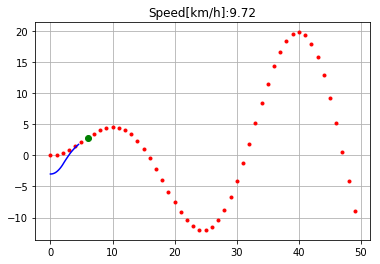

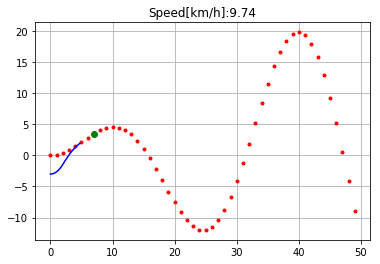

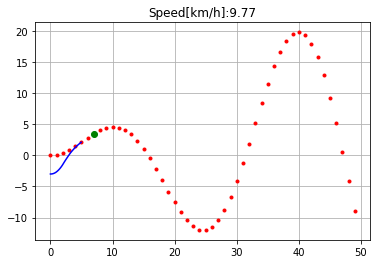

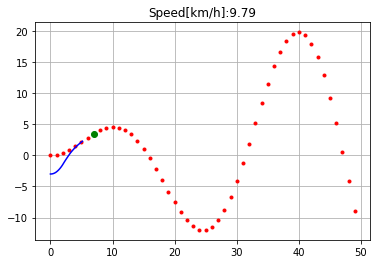

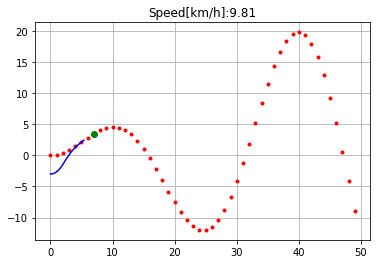

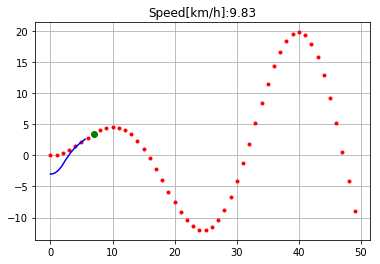

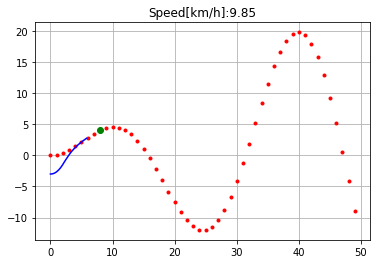

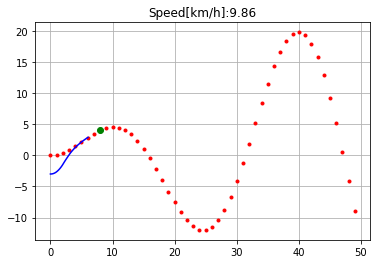

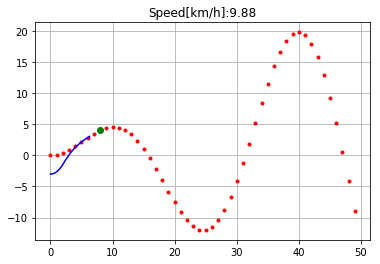

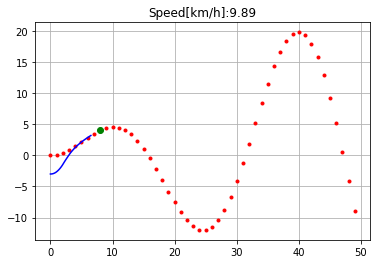

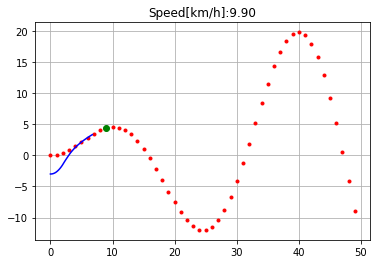

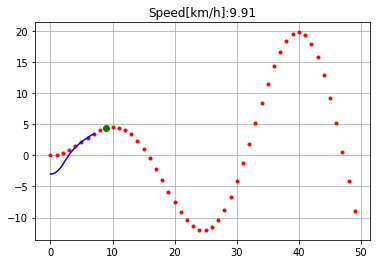

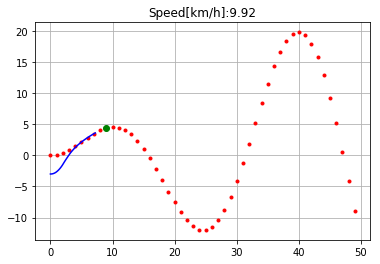

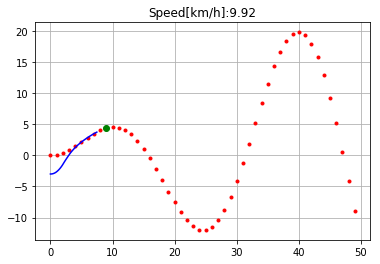

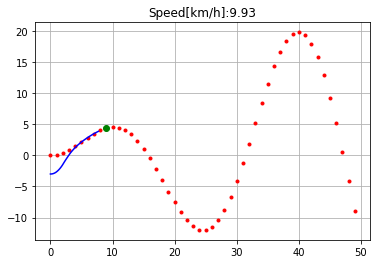

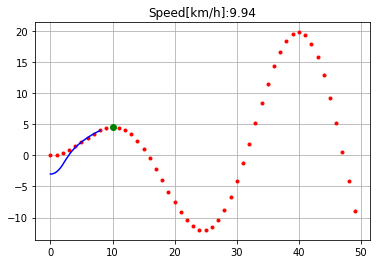

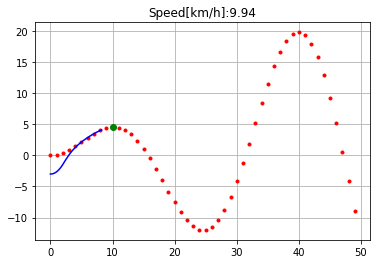

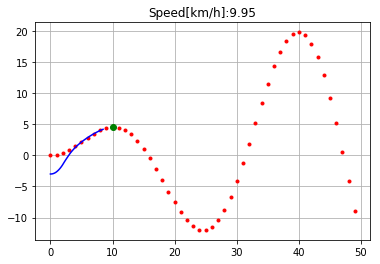

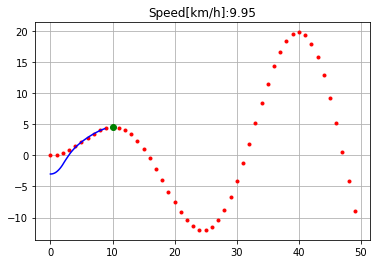

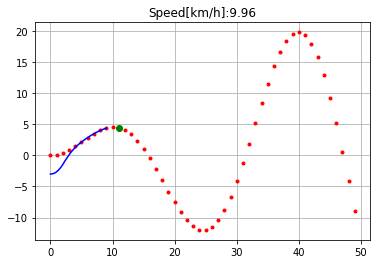

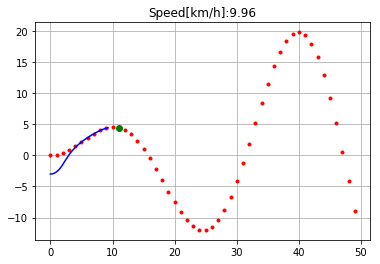

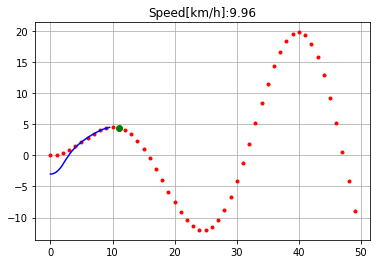

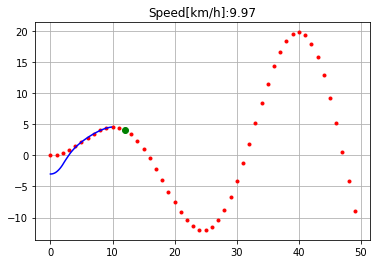

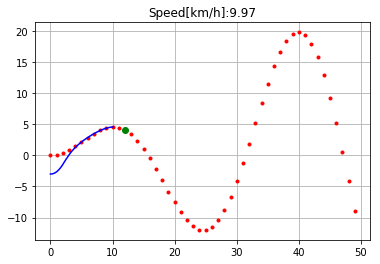

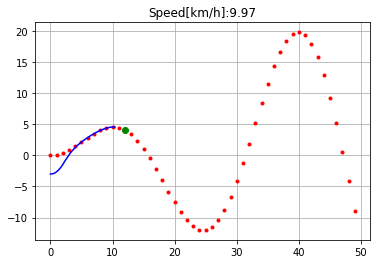

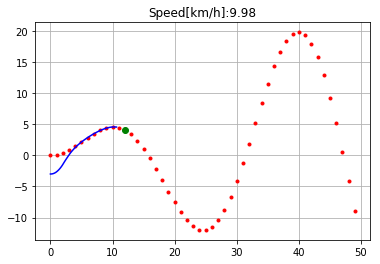

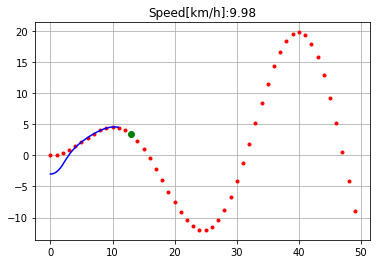

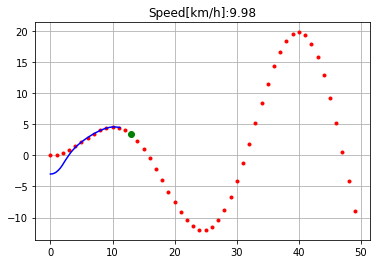

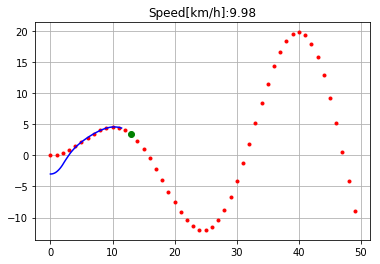

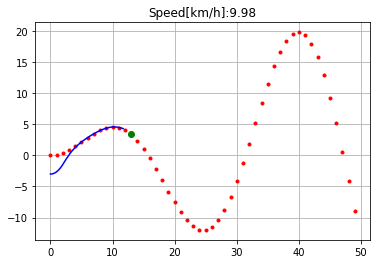

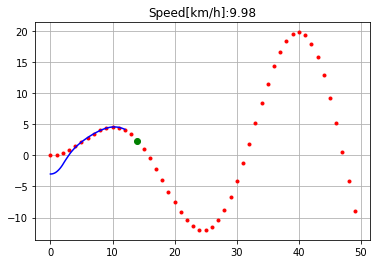

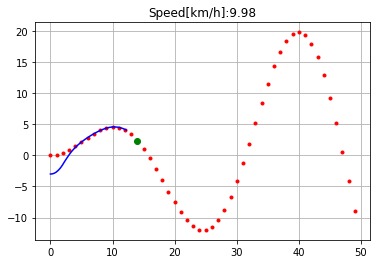

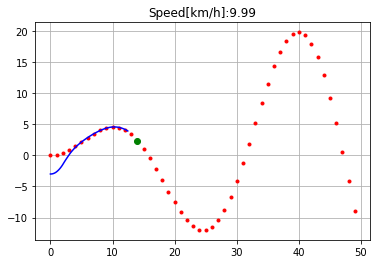

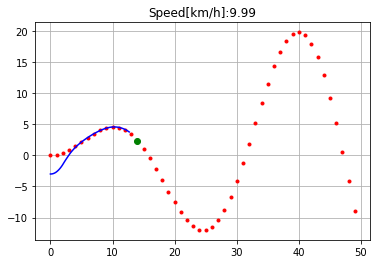

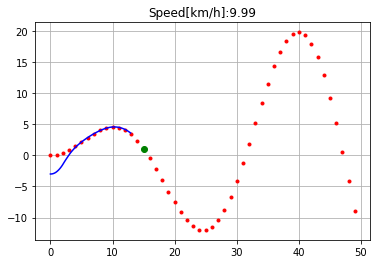

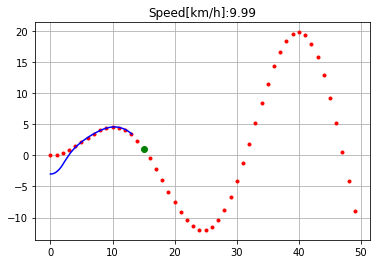

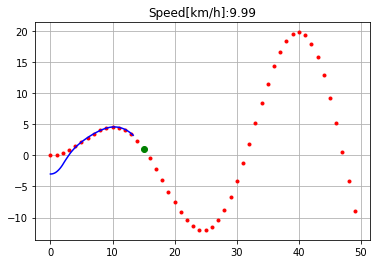

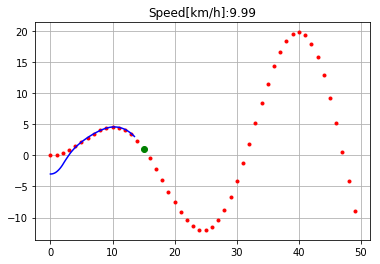

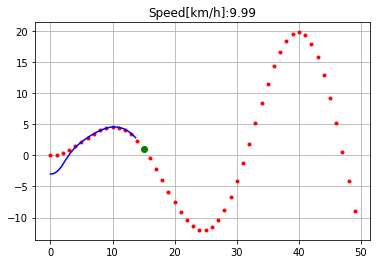

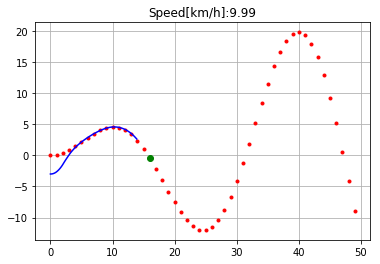

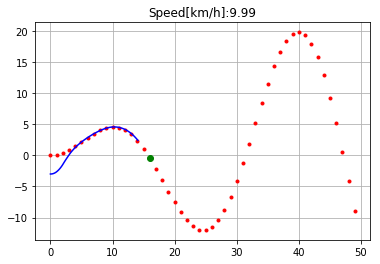

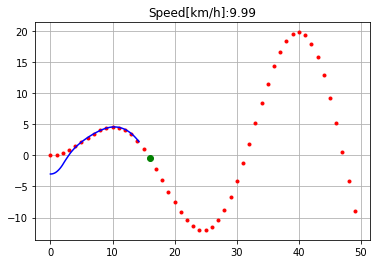

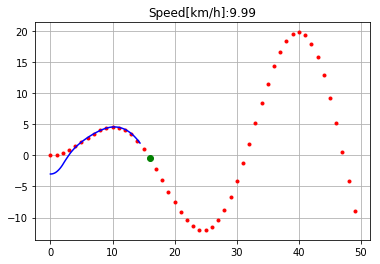

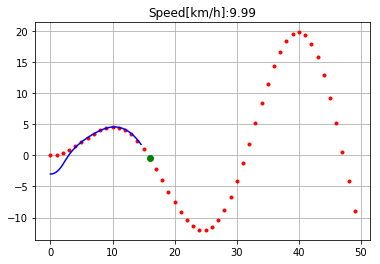

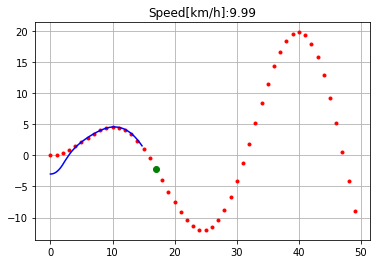

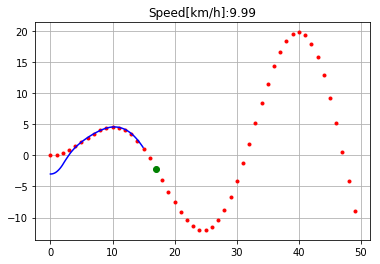

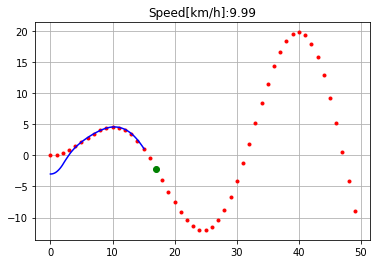

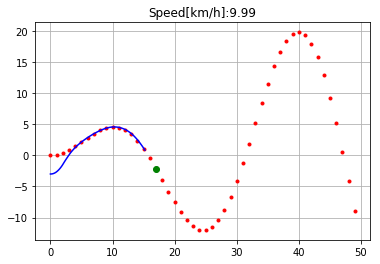

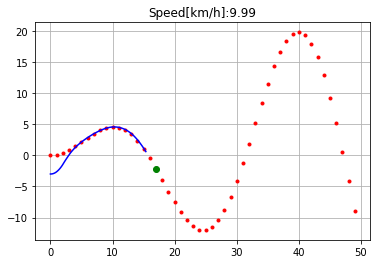

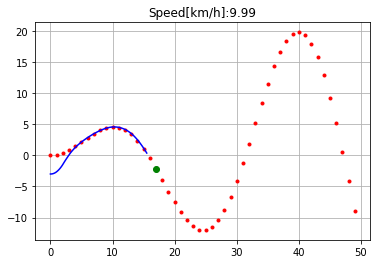

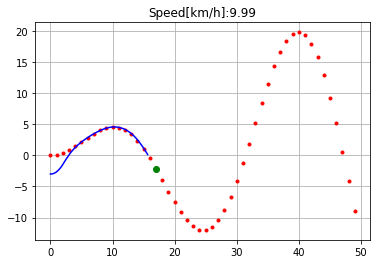

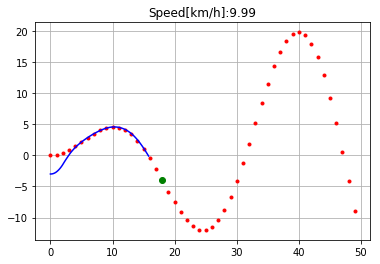

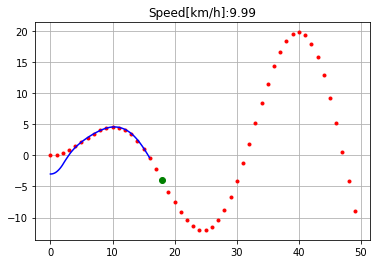

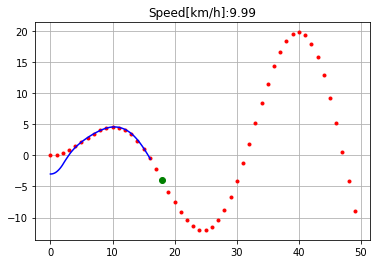

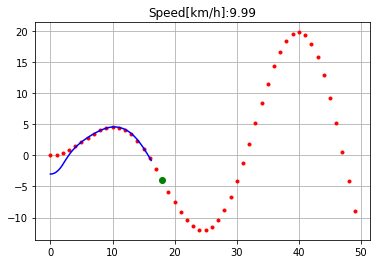

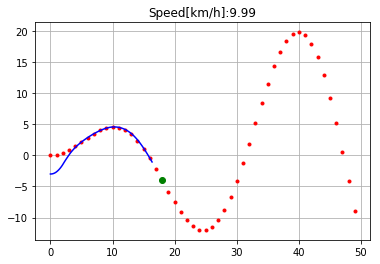

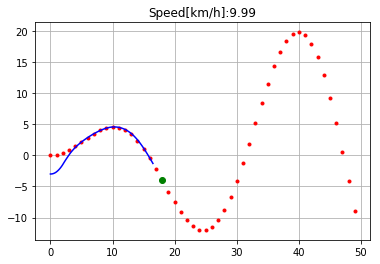

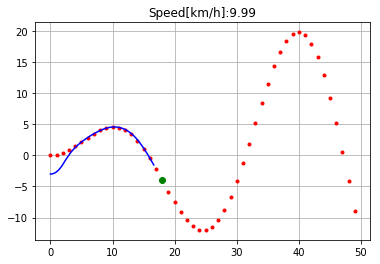

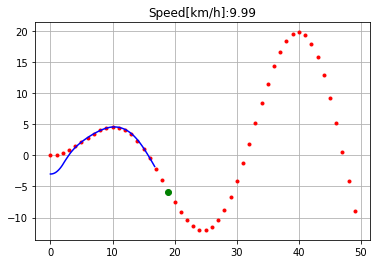

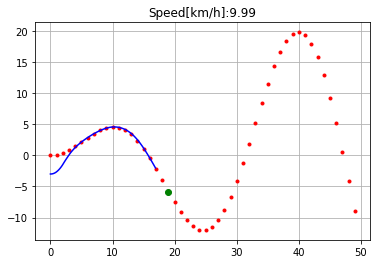

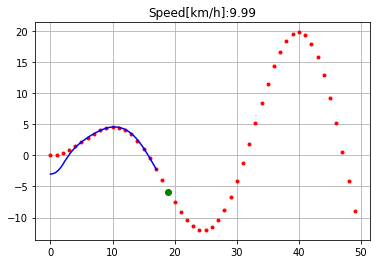

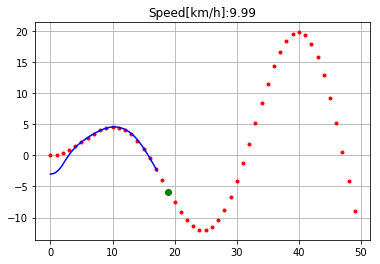

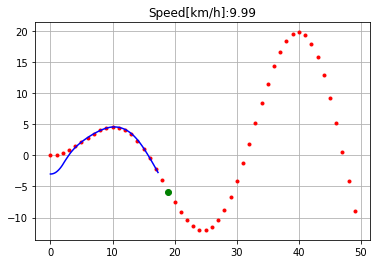

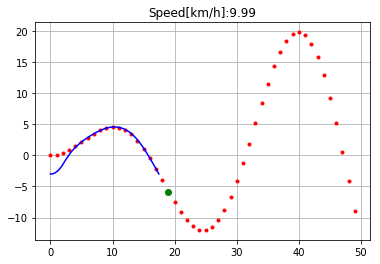

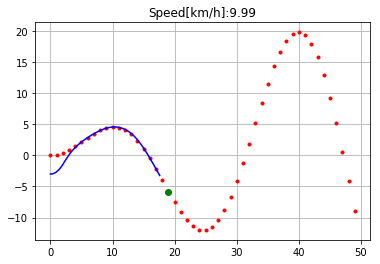

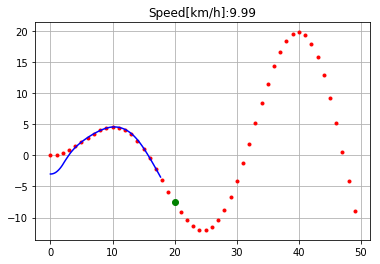

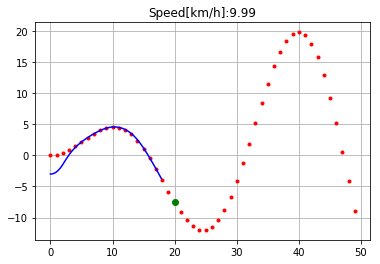

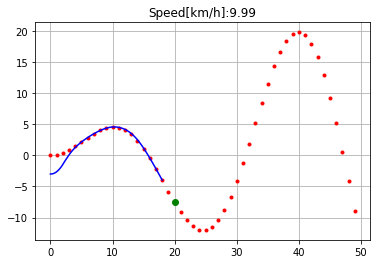

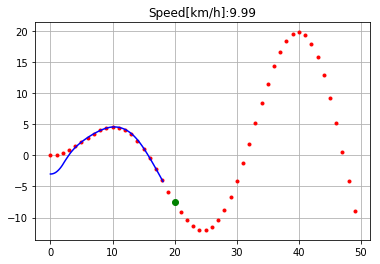

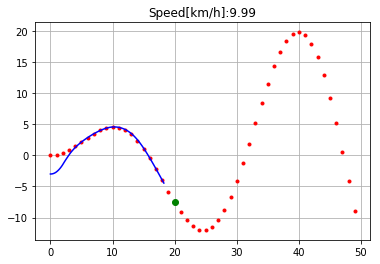

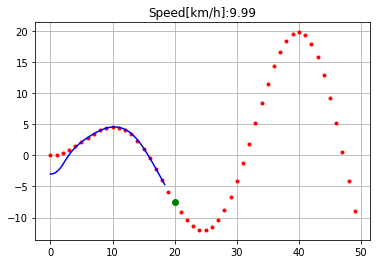

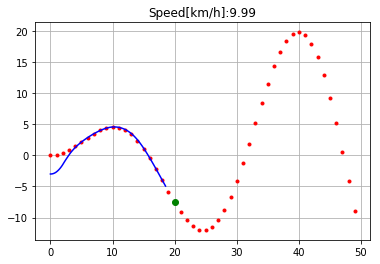

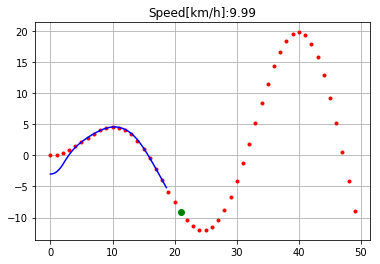

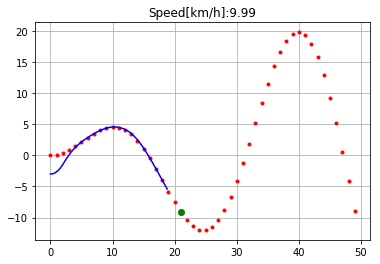

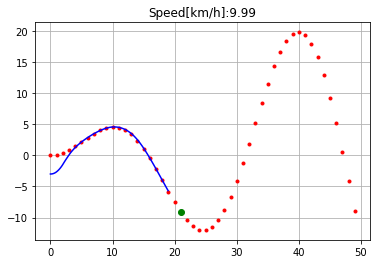

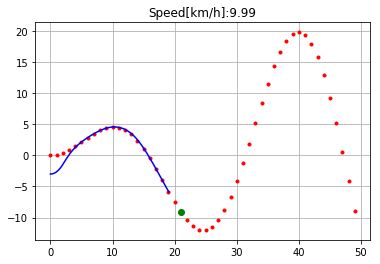

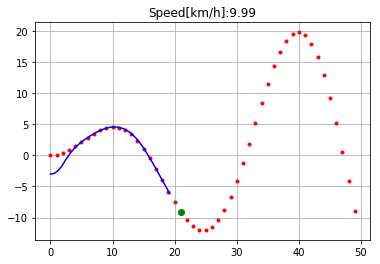

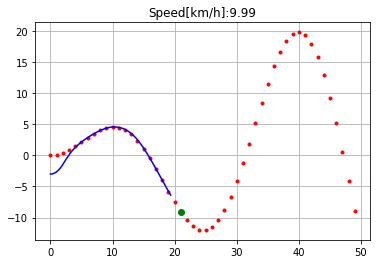

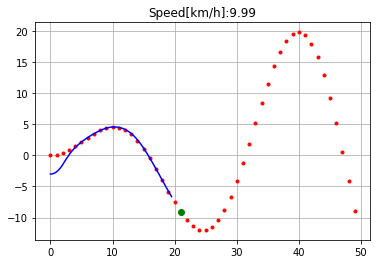

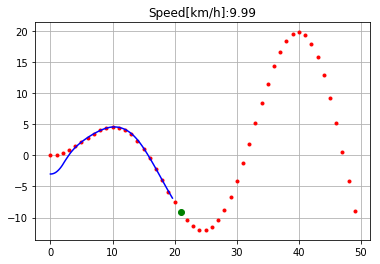

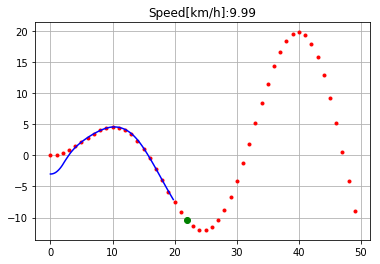

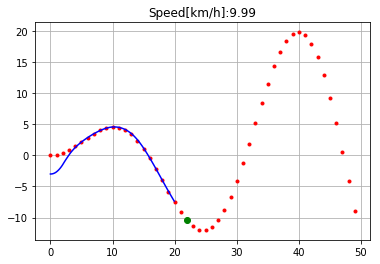

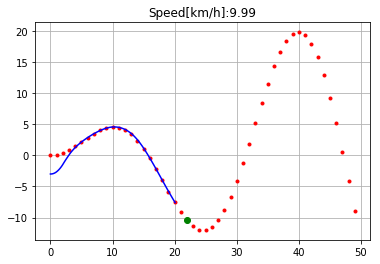

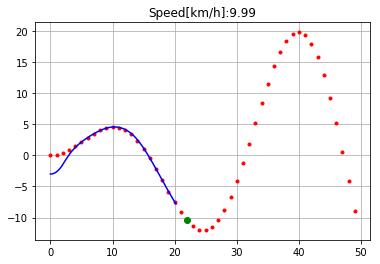

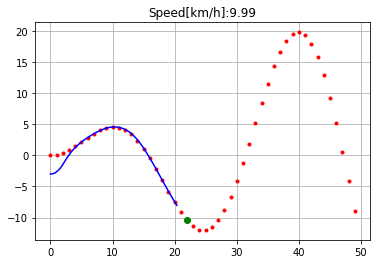

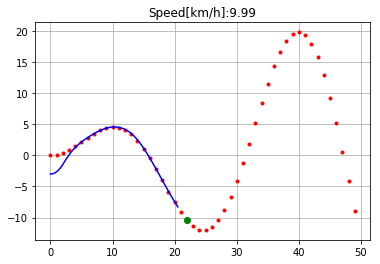

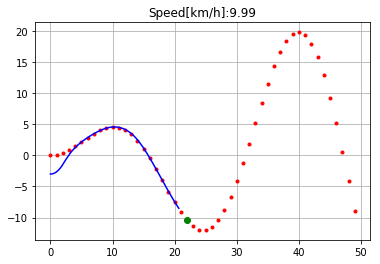

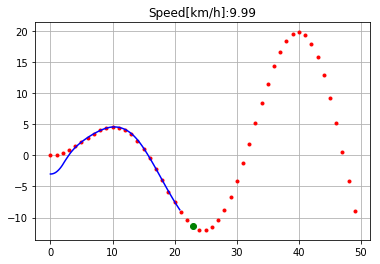

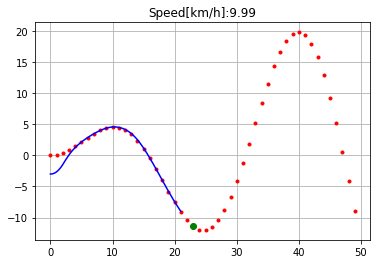

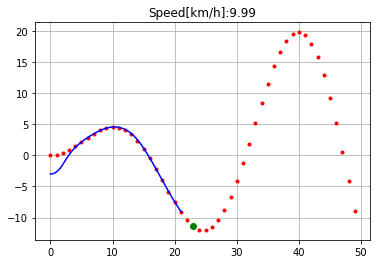

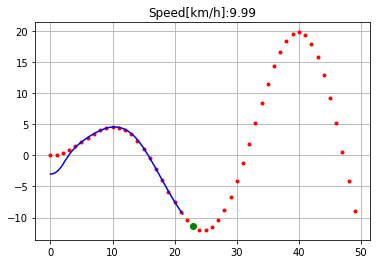

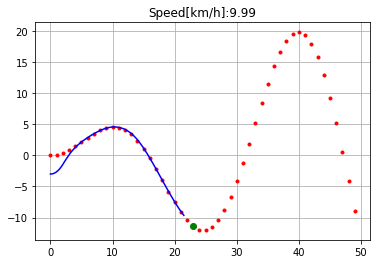

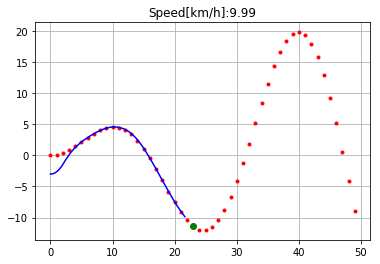

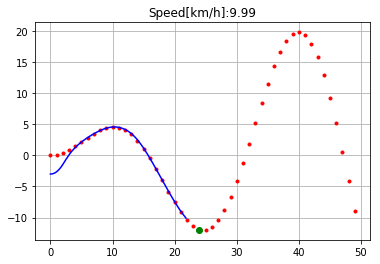

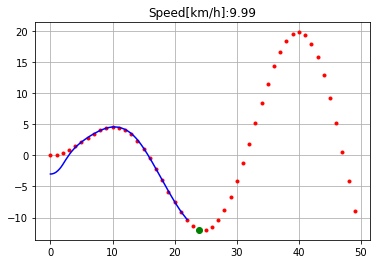

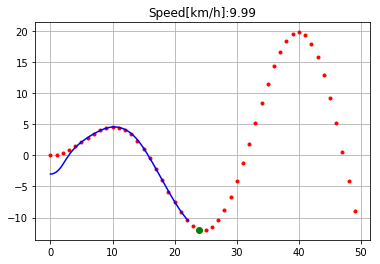

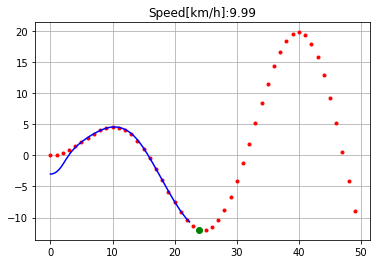

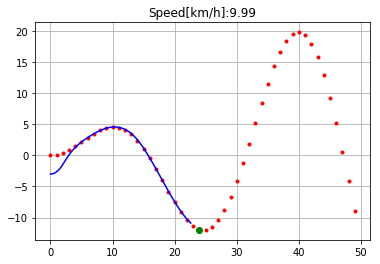

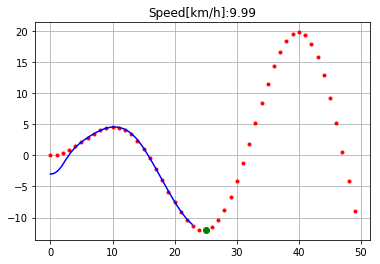

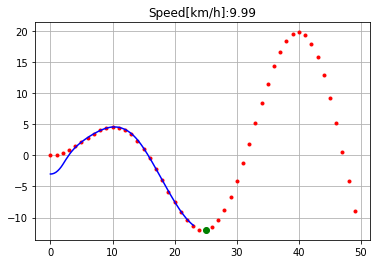

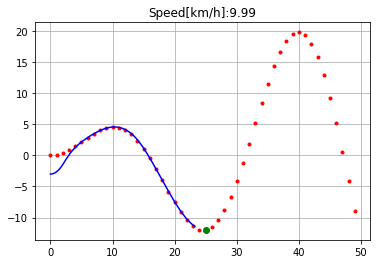

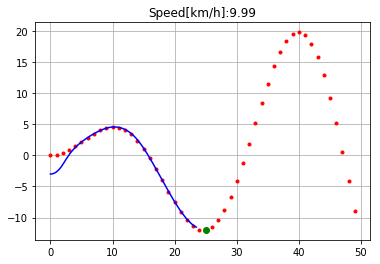

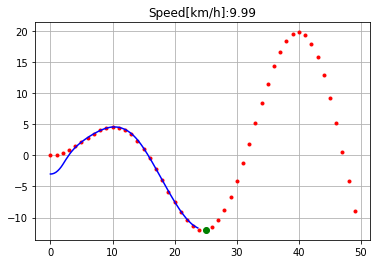

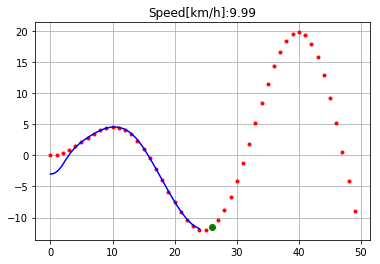

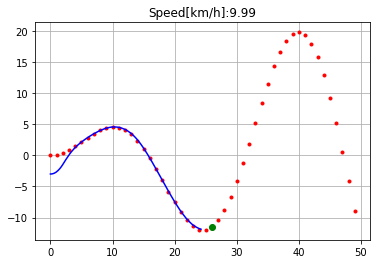

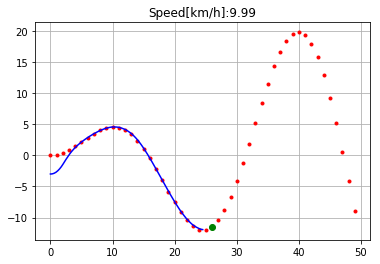

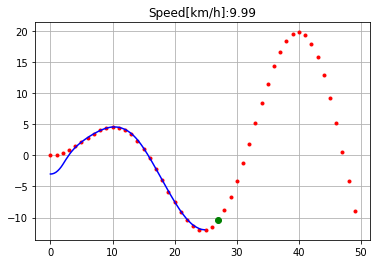

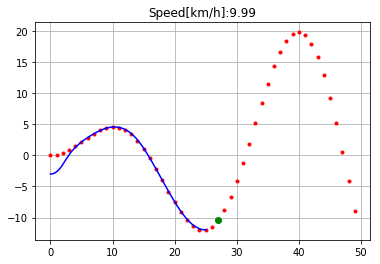

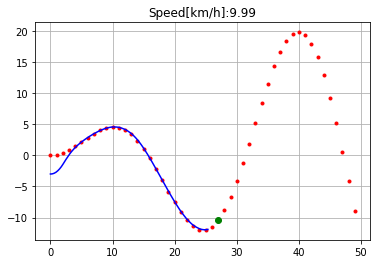

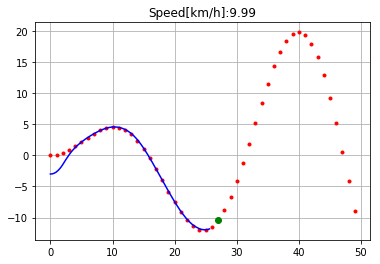

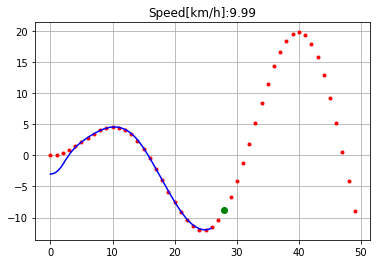

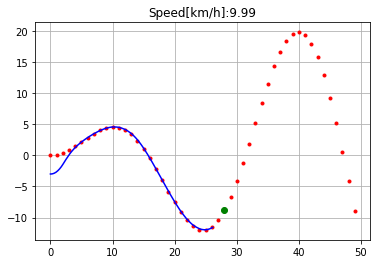

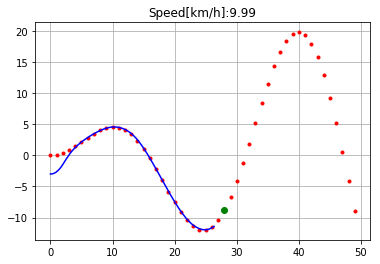

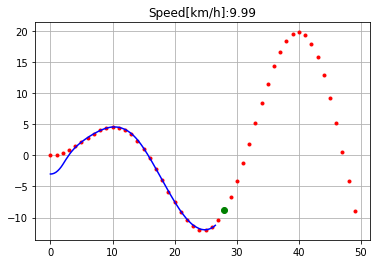

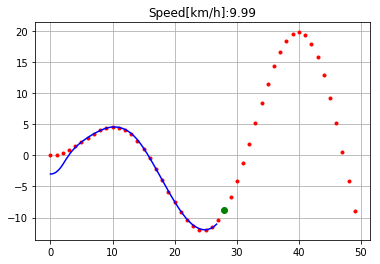

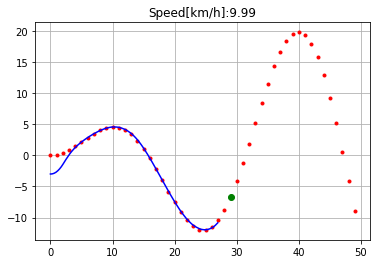

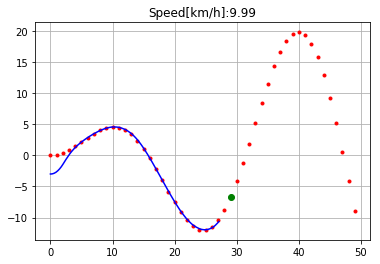

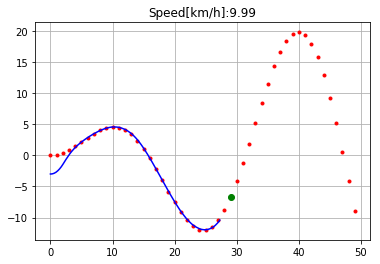

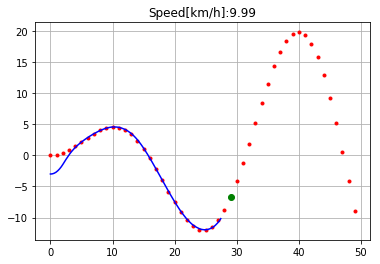

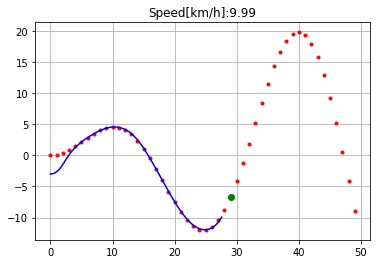

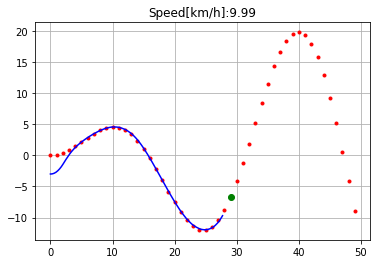

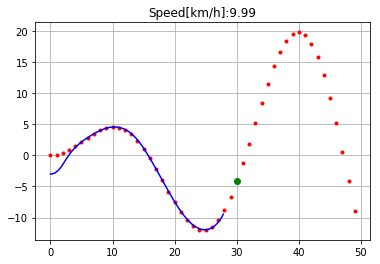

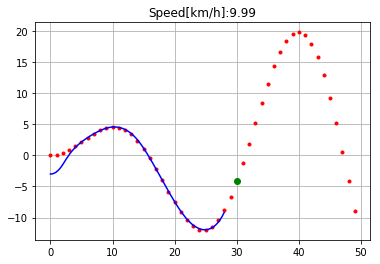

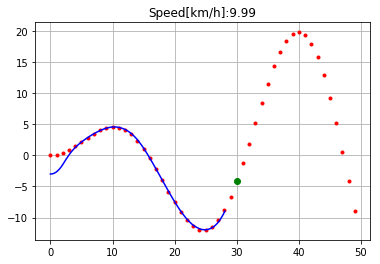

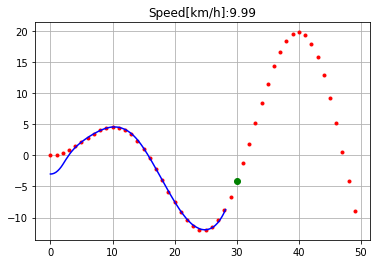

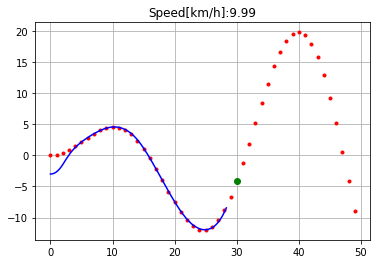

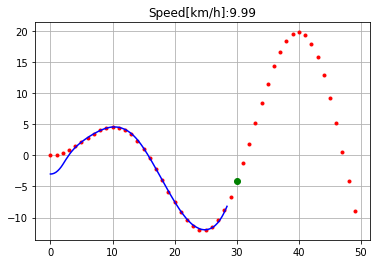

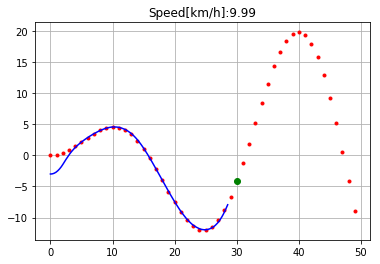

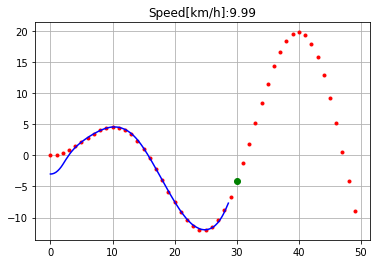

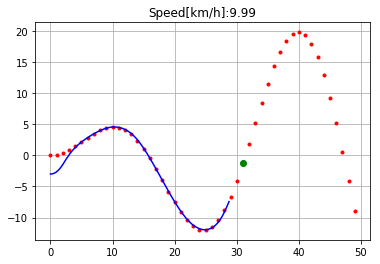

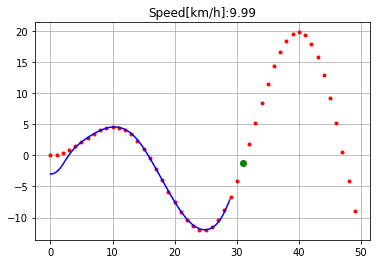

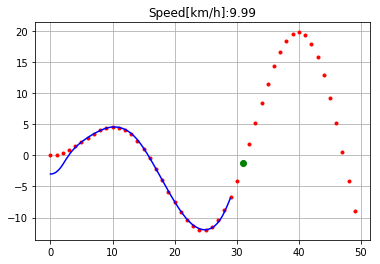

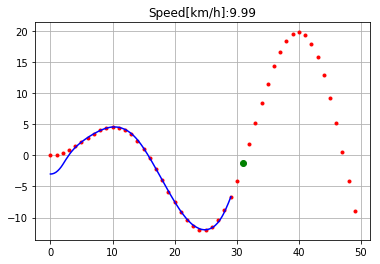

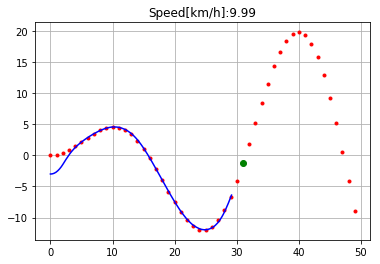

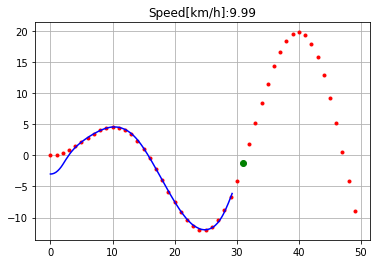

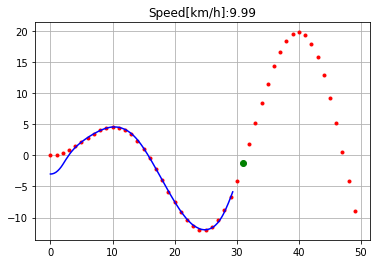

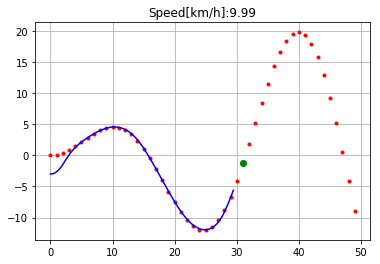

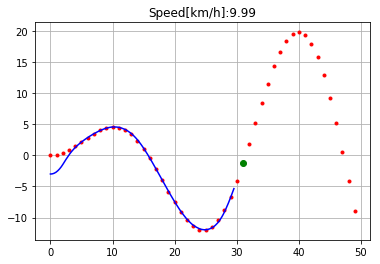

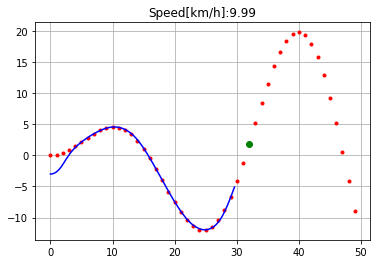

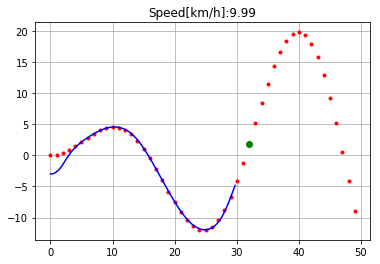

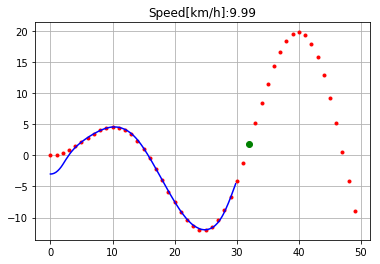

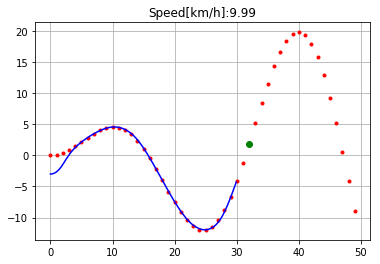

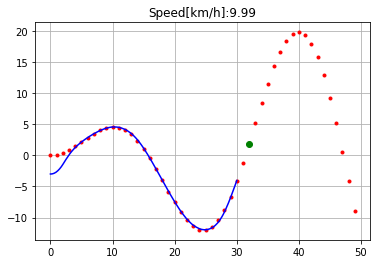

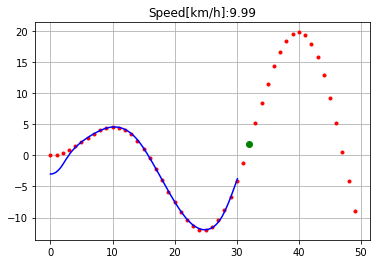

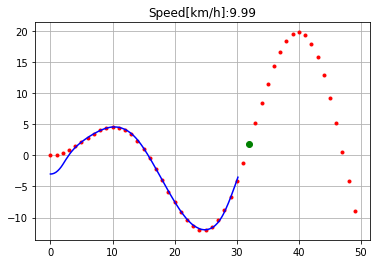

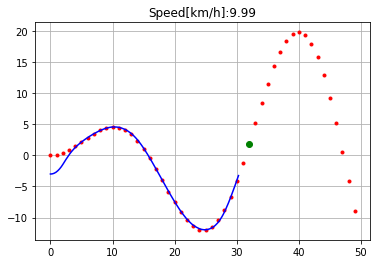

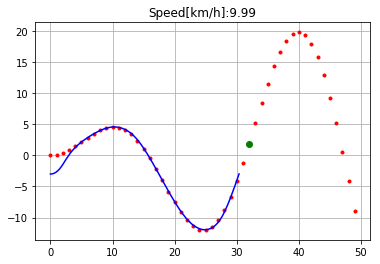

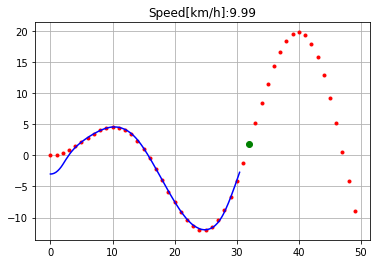

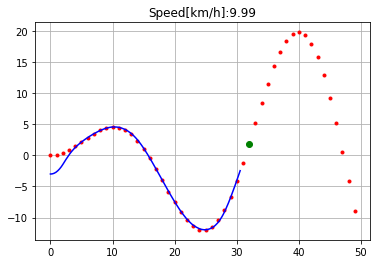

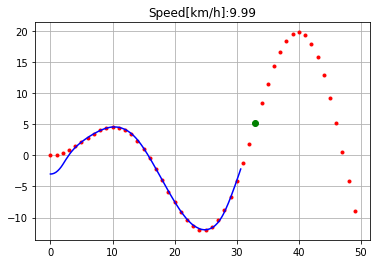

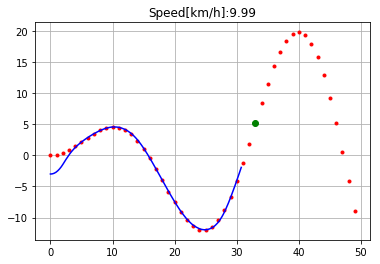

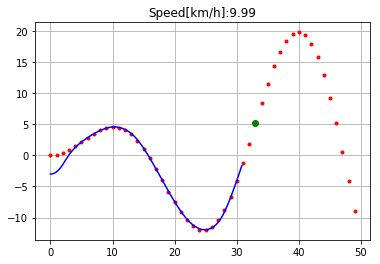

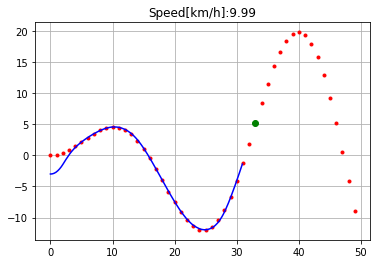

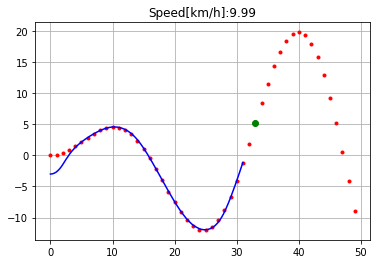

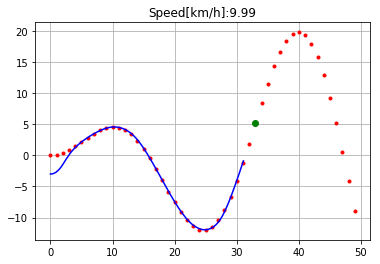

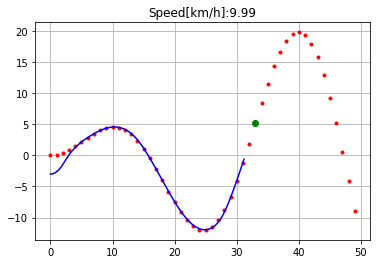

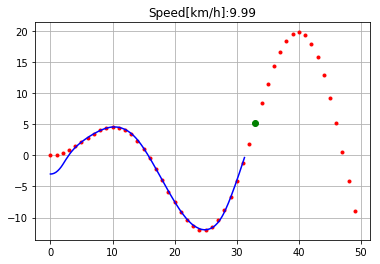

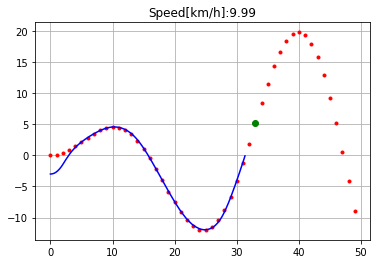

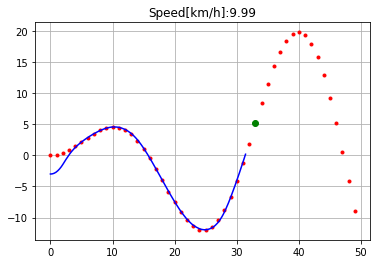

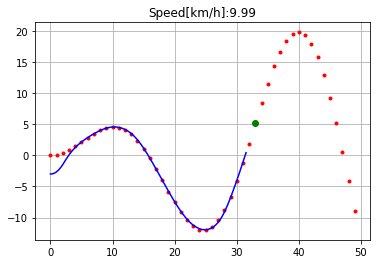

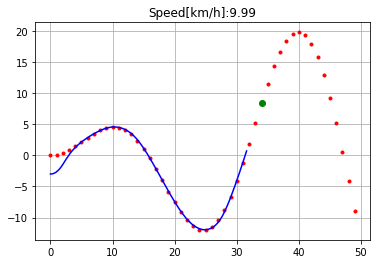

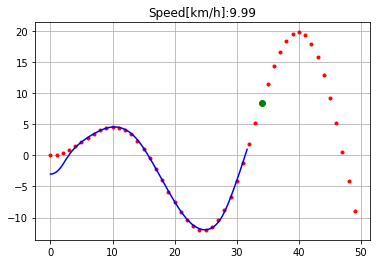

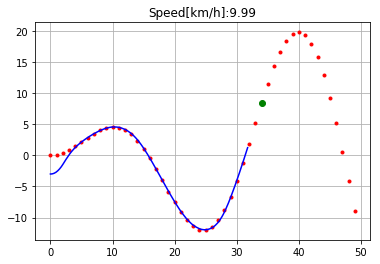

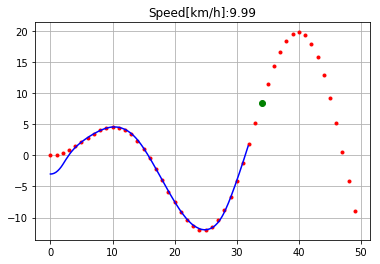

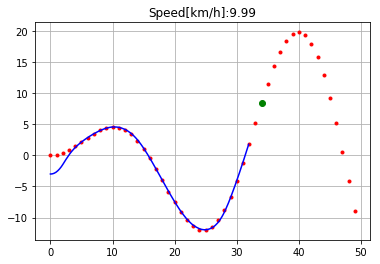

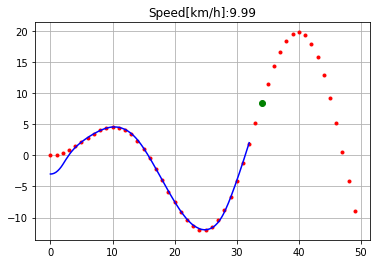

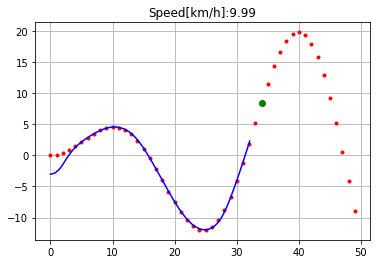

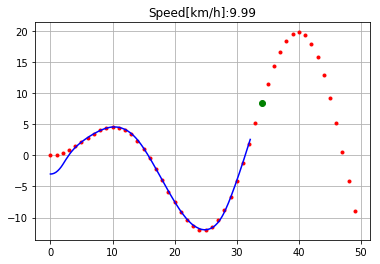

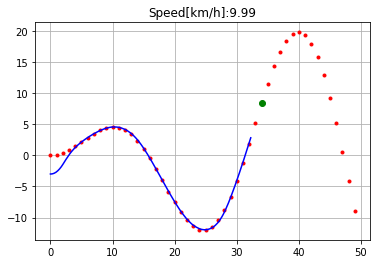

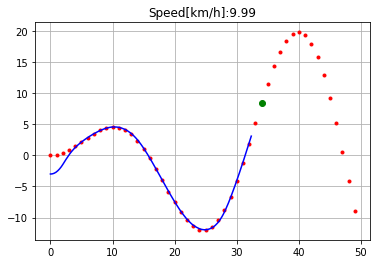

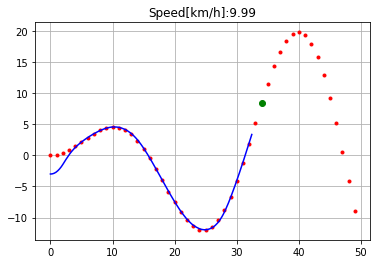

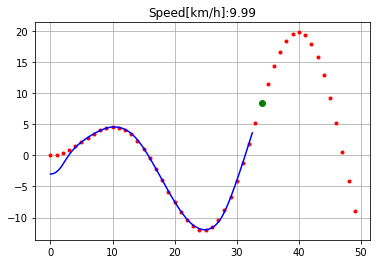

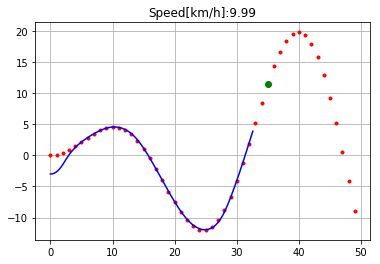

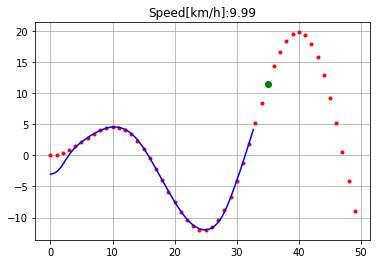

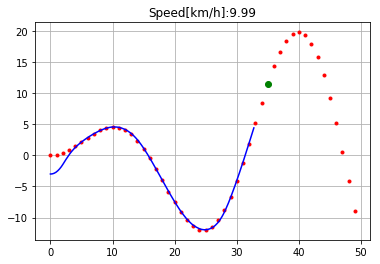

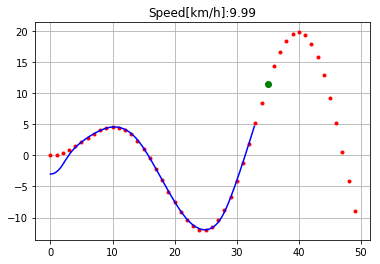

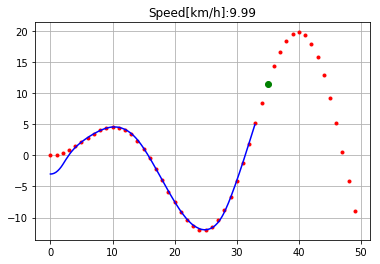

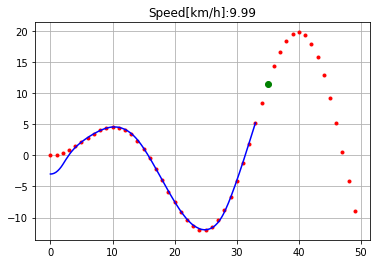

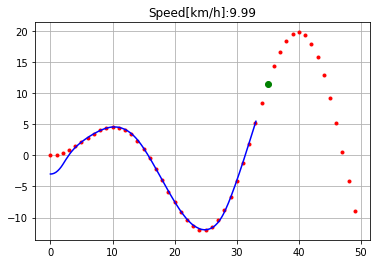

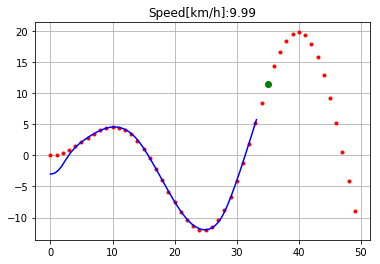

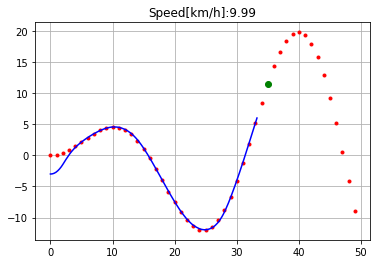

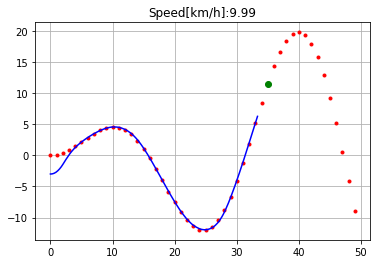

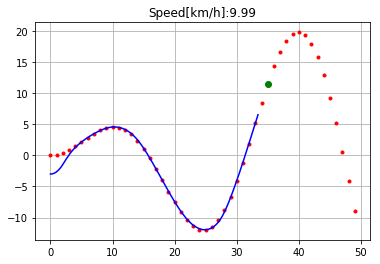

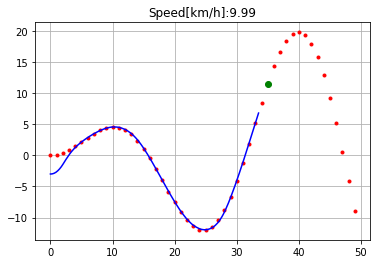

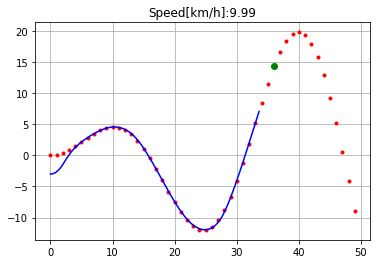

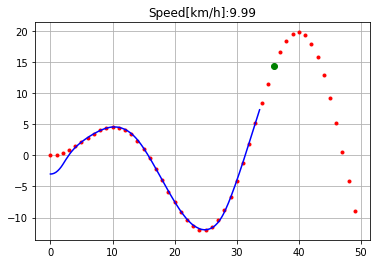

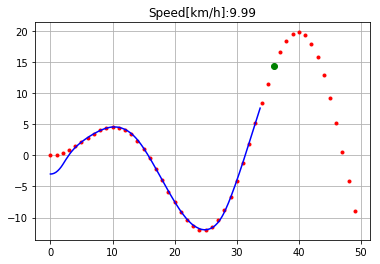

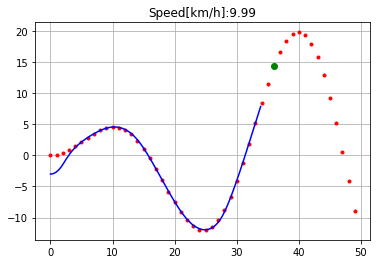

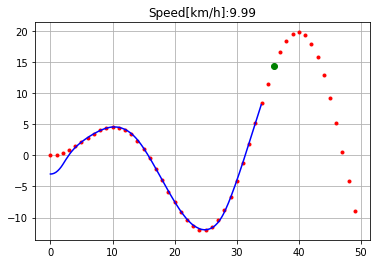

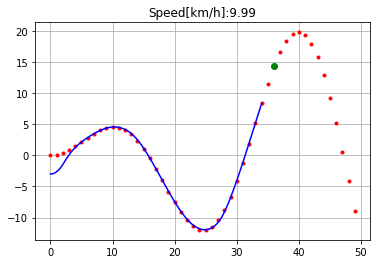

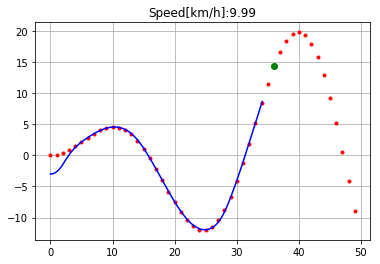

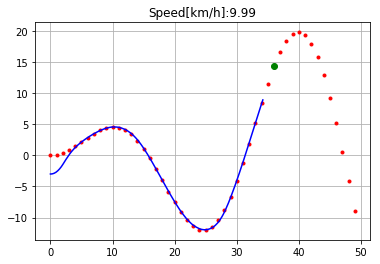

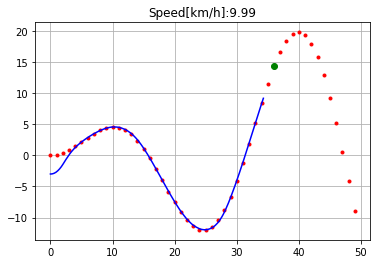

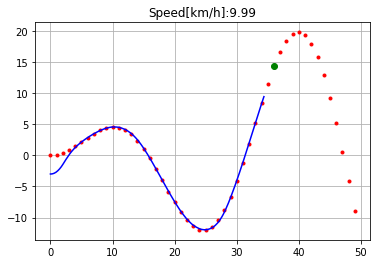

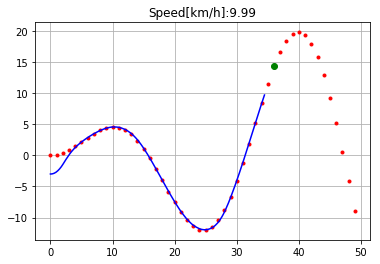

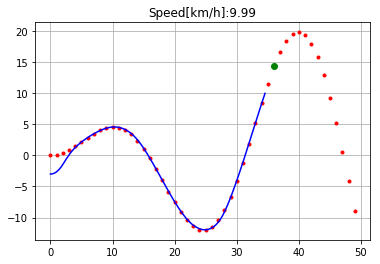

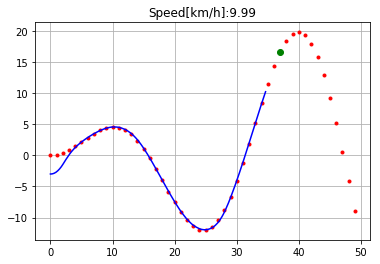

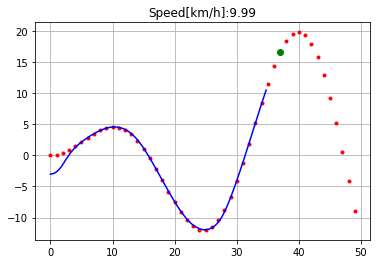

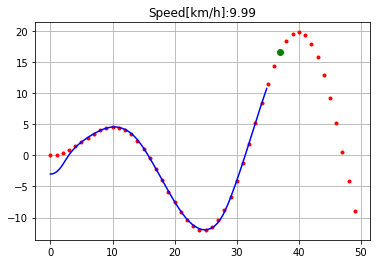

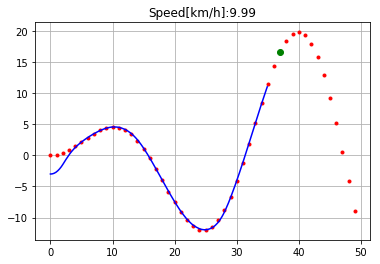

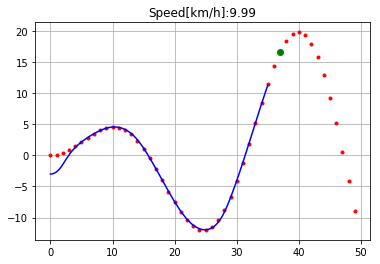

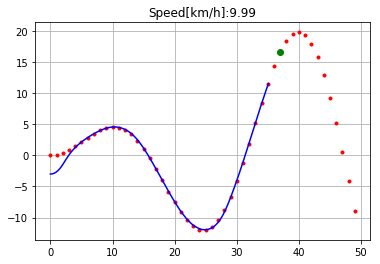

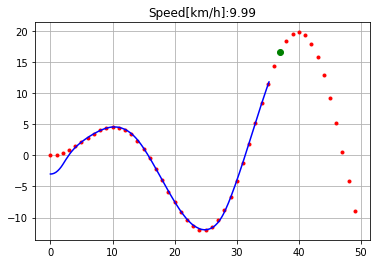

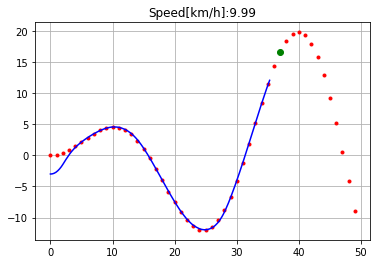

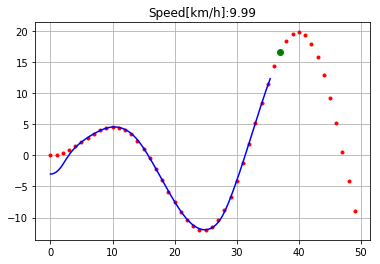

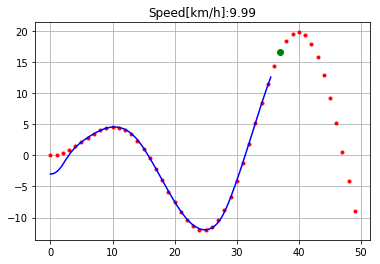

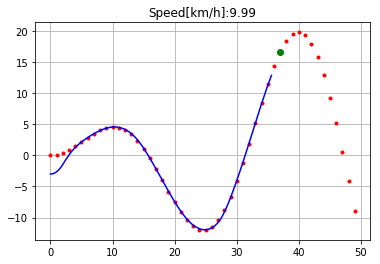

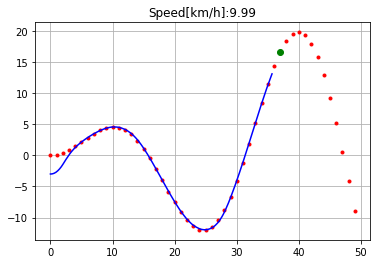

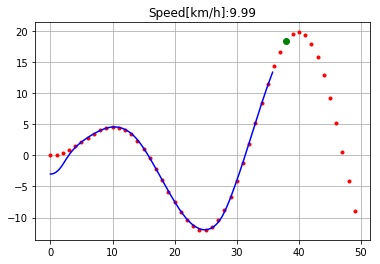

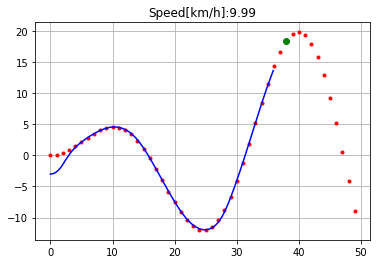

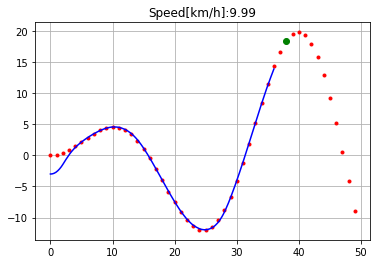

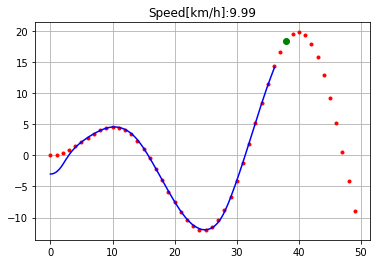

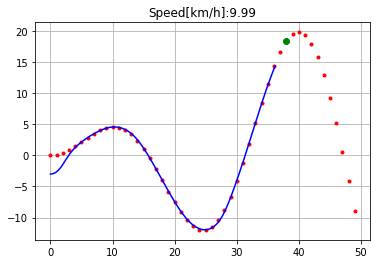

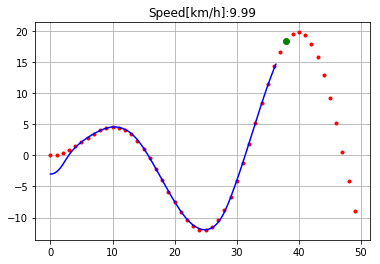

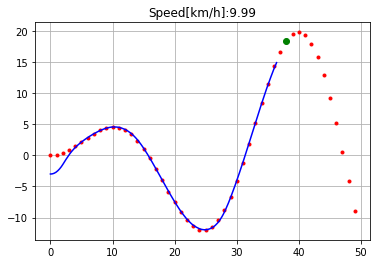

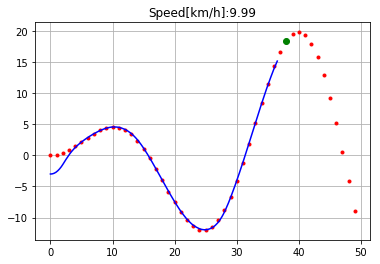

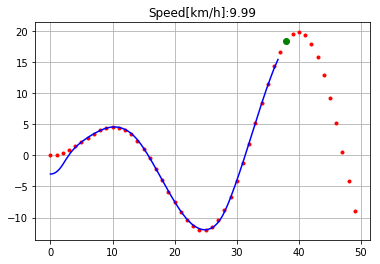

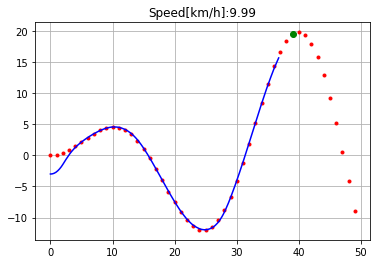

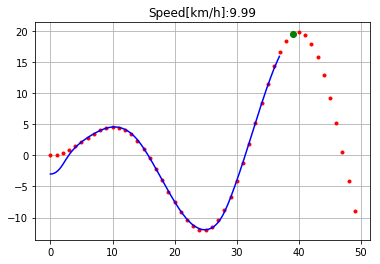

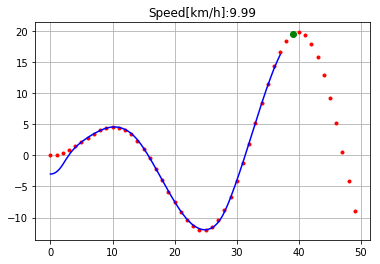

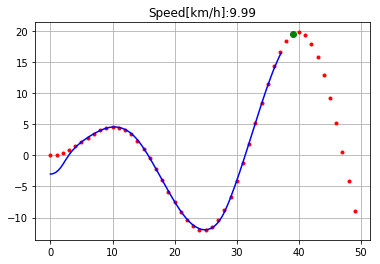

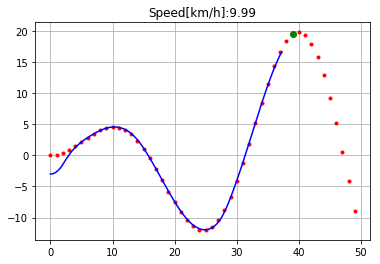

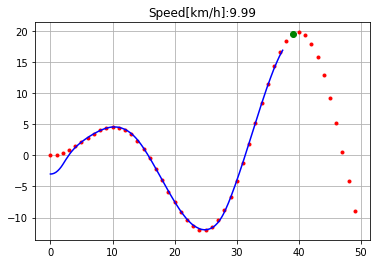

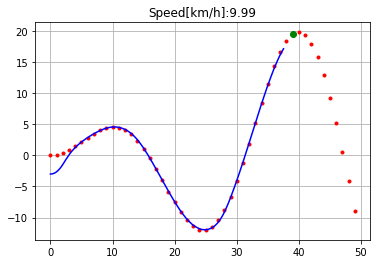

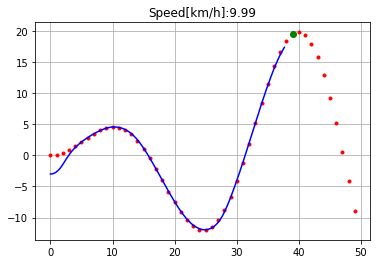

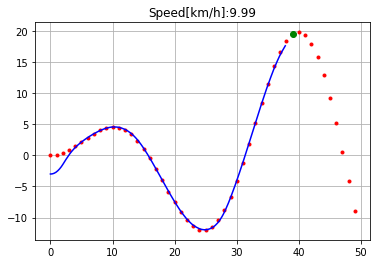

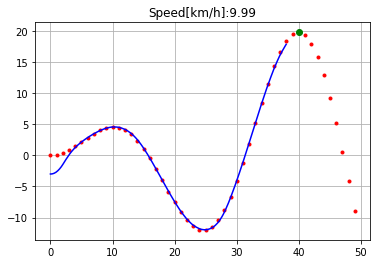

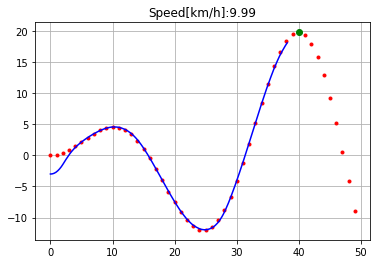

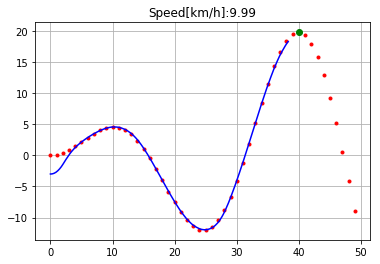

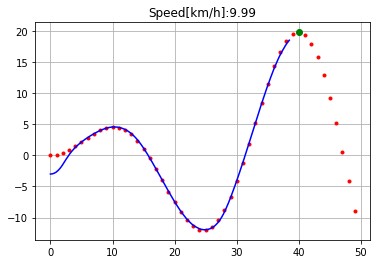

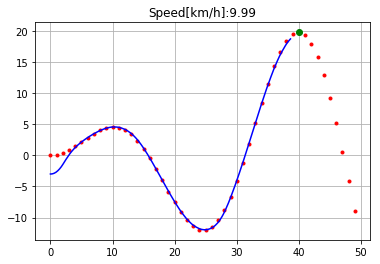

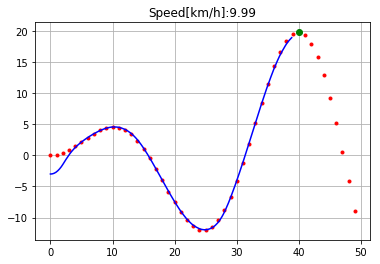

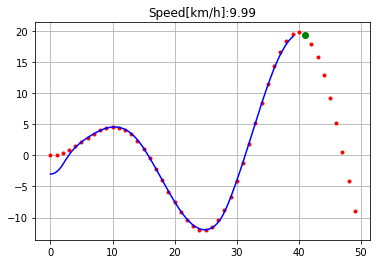

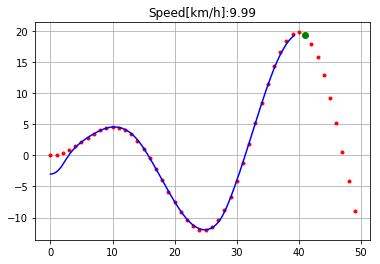

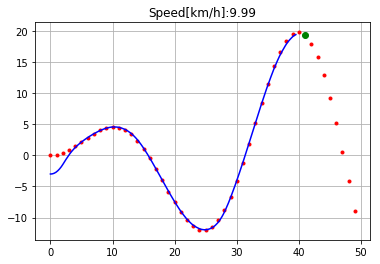

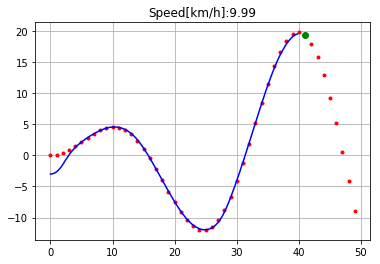

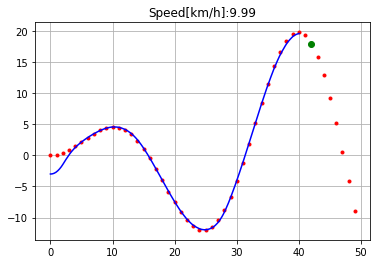

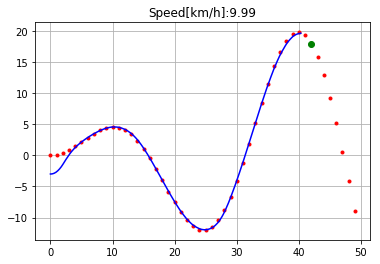

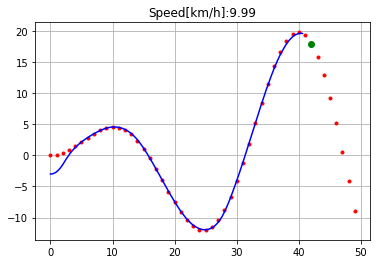

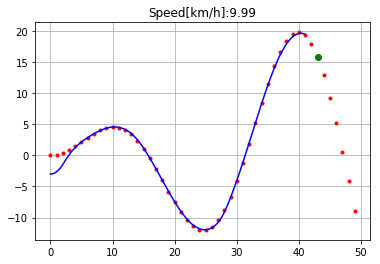

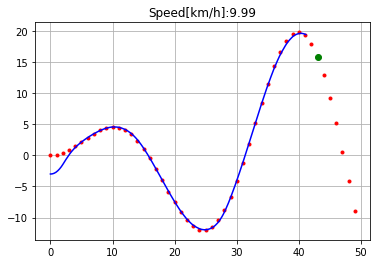

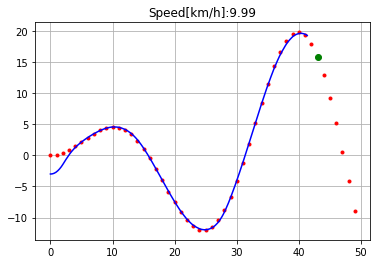

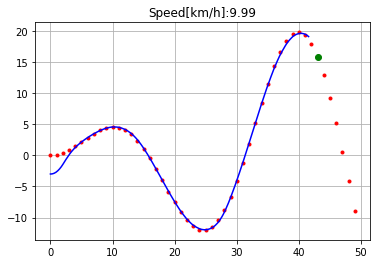

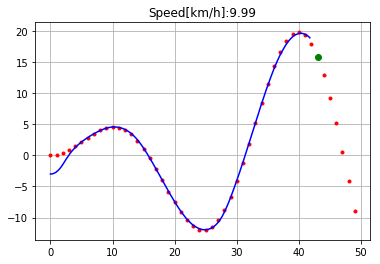

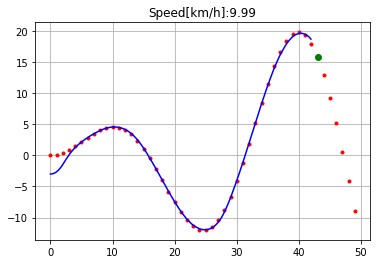

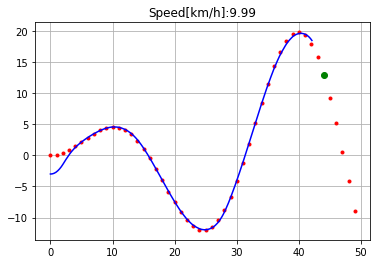

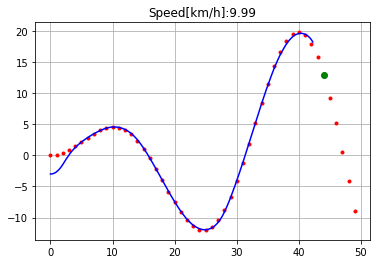

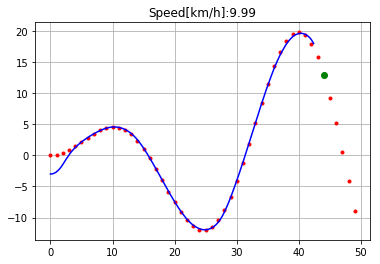

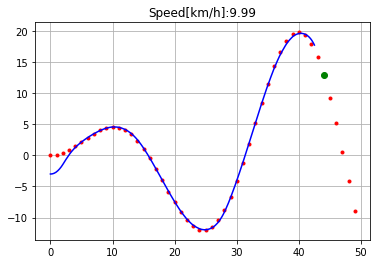

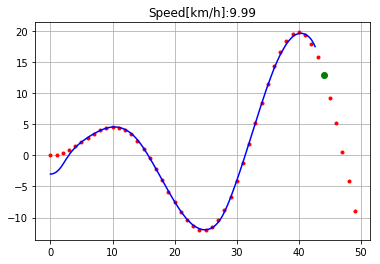

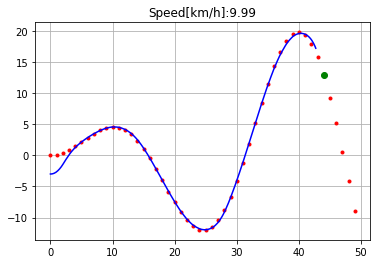

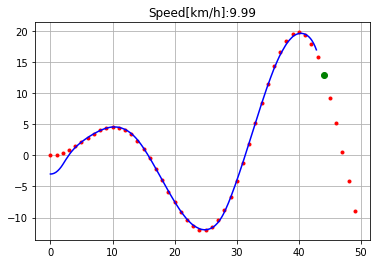

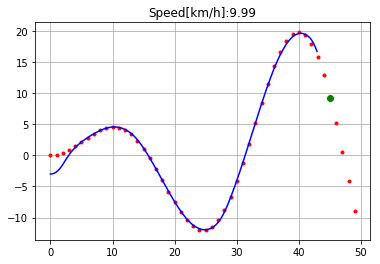

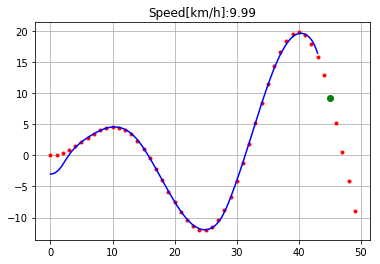

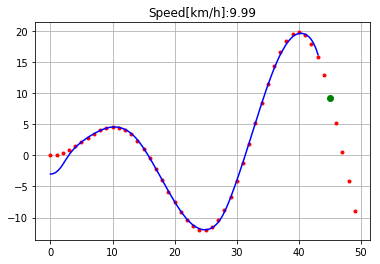

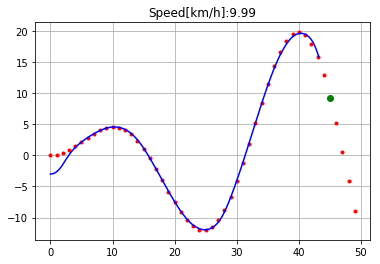

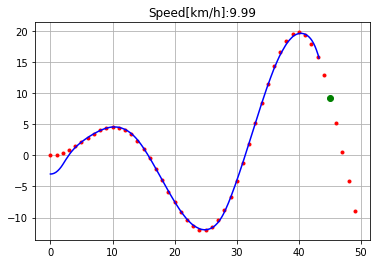

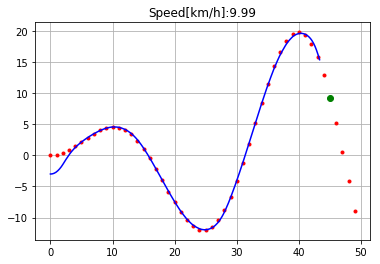

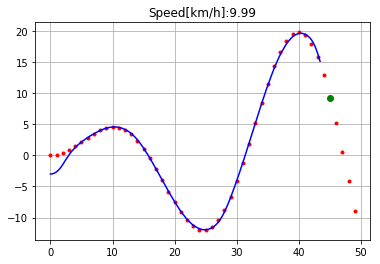

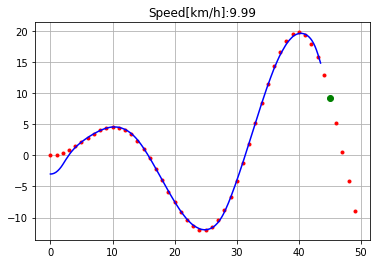

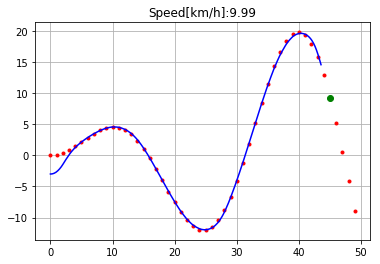

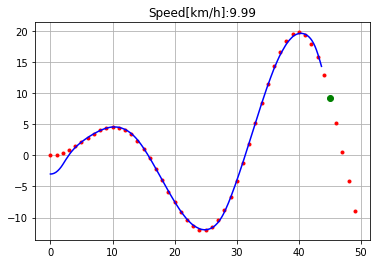

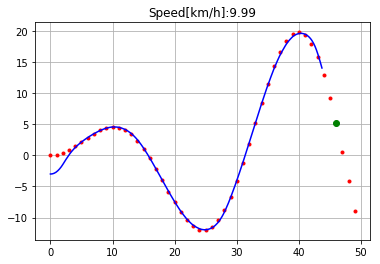

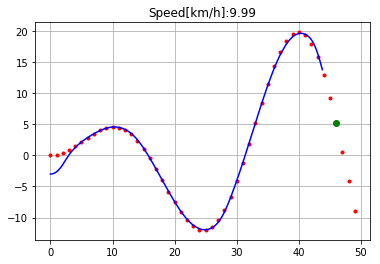

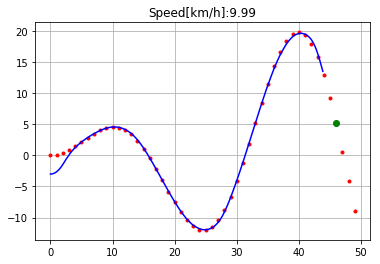

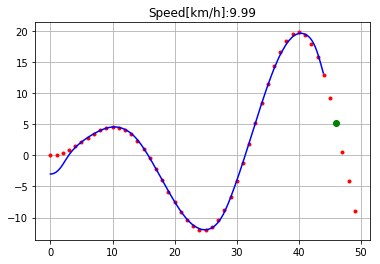

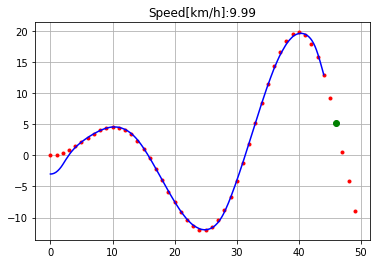

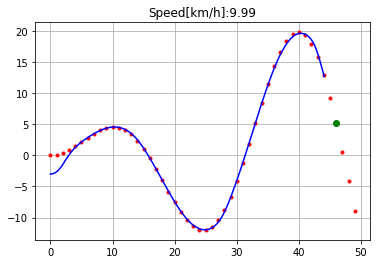

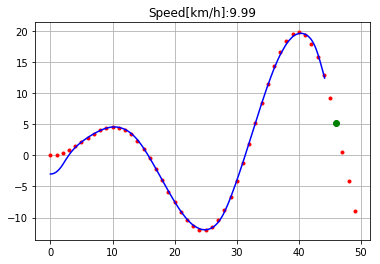

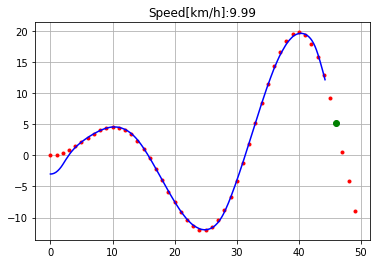

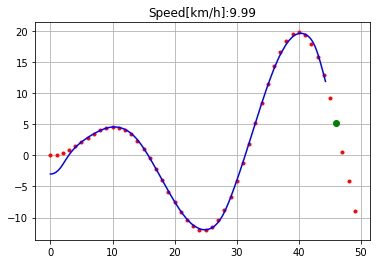

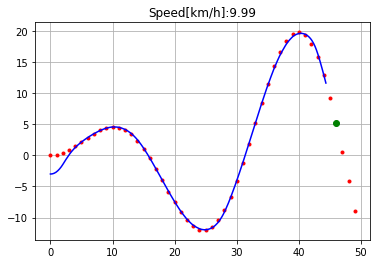

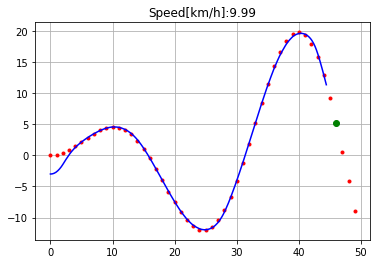

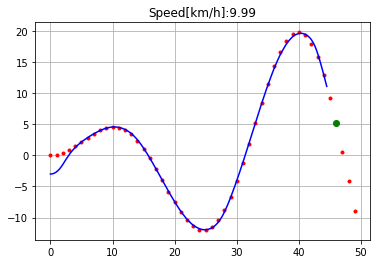

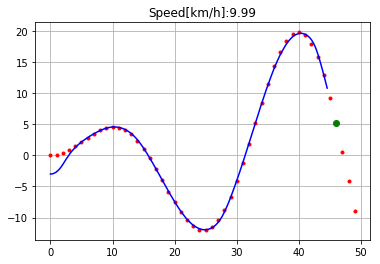

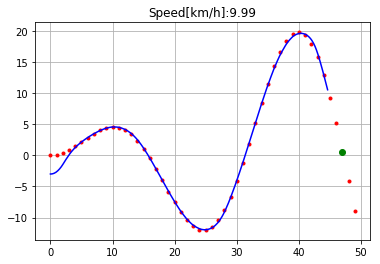

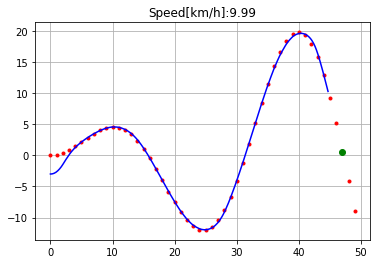

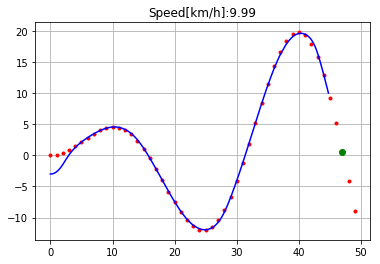

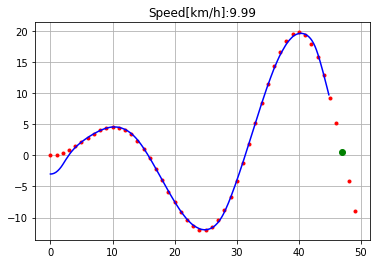

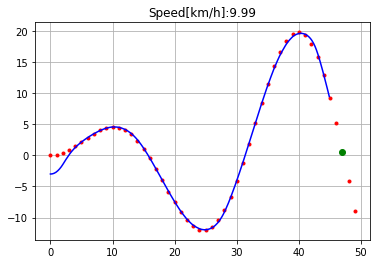

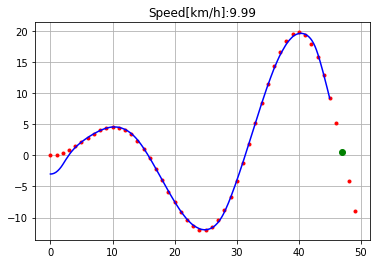

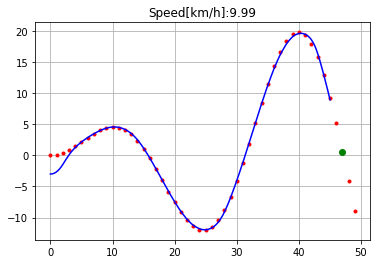

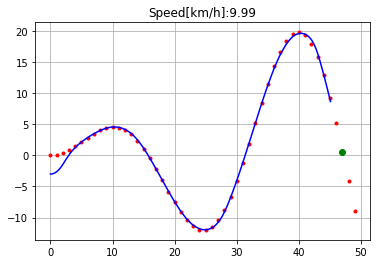

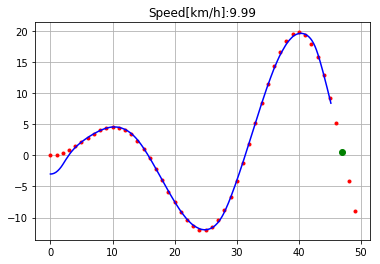

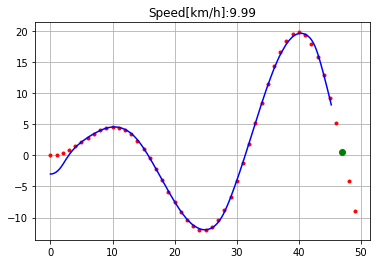

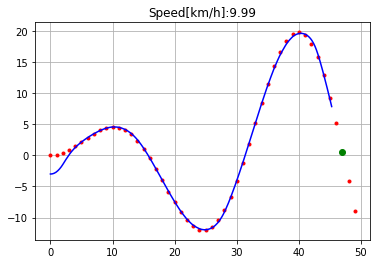

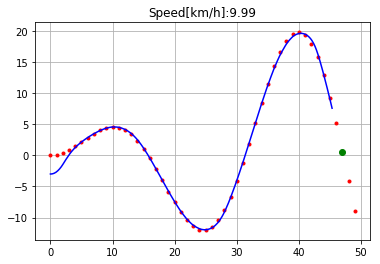

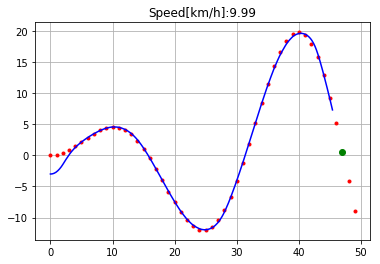

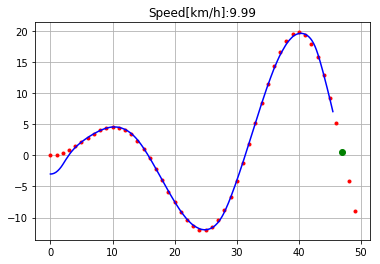

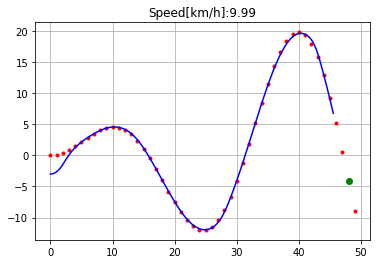

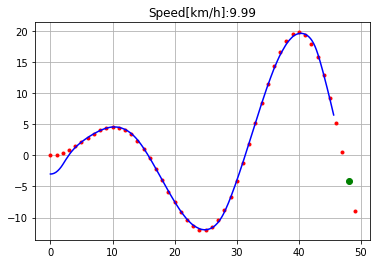

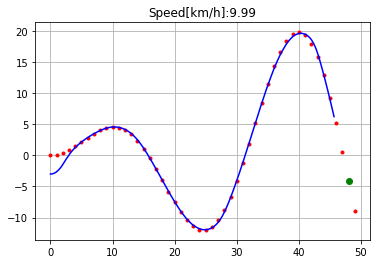

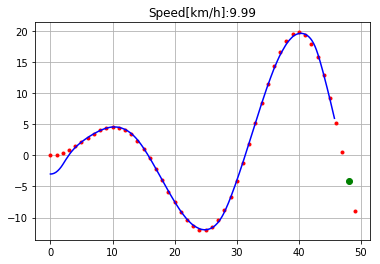

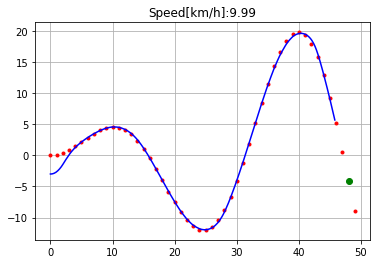

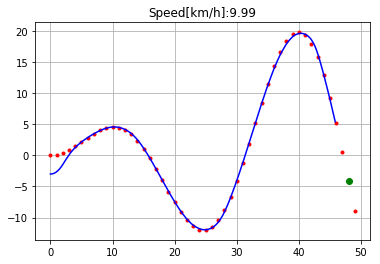

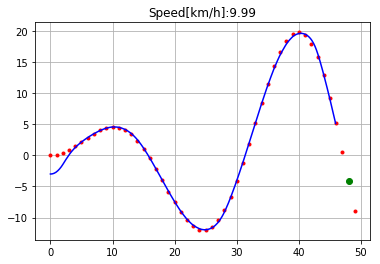

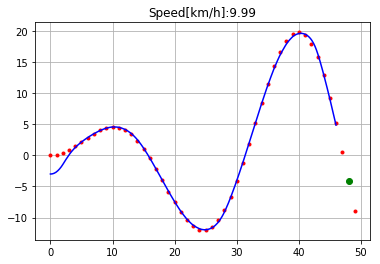

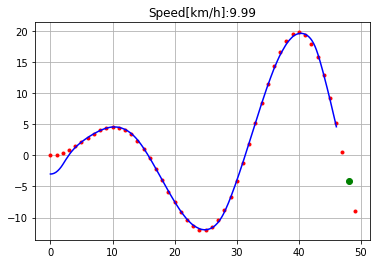

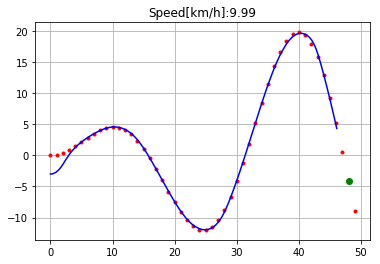

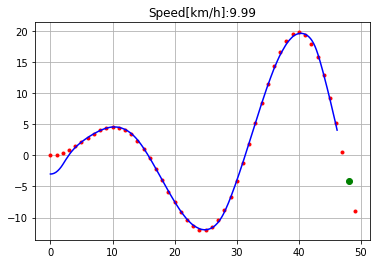

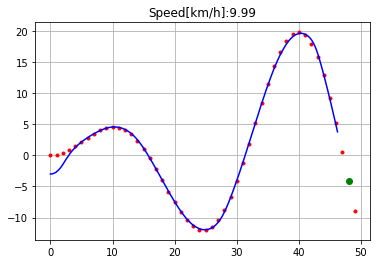

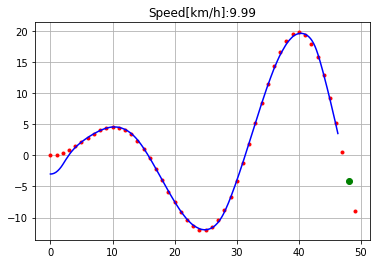

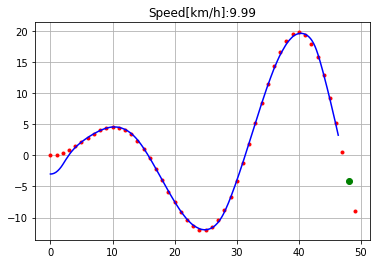

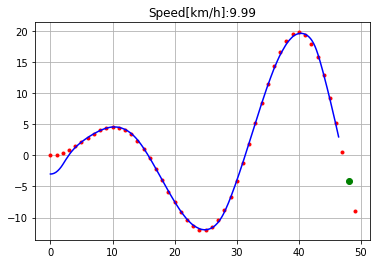

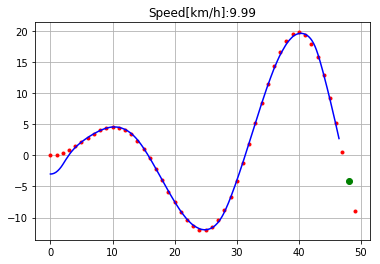

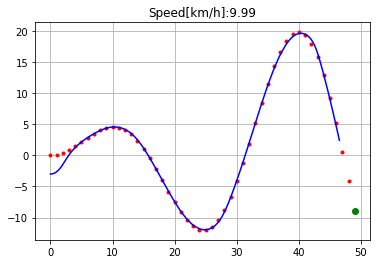

In [5]:
def main():
    #  设置目标路点
    cx = np.arange(0, 50, 1)
    cy = [math.sin(ix / 5.0) * ix / 2.0 for ix in cx]

    target_speed = 10.0 / 3.6  # [m/s]

    T = 100.0  # 最大模拟时间

    # 设置车辆的初始状态
    state = VehicleState(x=-0.0, y=-3.0, yaw=0.0, v=0.0)

    lastIndex = len(cx) - 1
    time = 0.0
    x = [state.x]
    y = [state.y]
    yaw = [state.yaw]
    v = [state.v]
    t = [0.0]
    target_ind = calc_target_index(state, cx, cy)

    while T >= time and lastIndex > target_ind:
        ai = PControl(target_speed, state.v)
        di, target_ind = pure_pursuit_control(state, cx, cy, target_ind)
        state = update(state, ai, di)

        time = time + dt

        x.append(state.x)
        y.append(state.y)
        yaw.append(state.yaw)
        v.append(state.v)
        t.append(time)

        plt.cla()
        plt.plot(cx, cy, ".r", label="course")
        plt.plot(x, y, "-b", label="trajectory")
        plt.plot(cx[target_ind], cy[target_ind], "go", label="target")
        plt.axis("equal")
        plt.grid(True)
        plt.title("Speed[km/h]:" + str(state.v * 3.6)[:4])
        plt.pause(0.001)

if __name__ == '__main__':
    main()